# 준비

In [142]:
import numpy as np
import pandas as pd
#import MeCab
from konlpy.tag import *
from gensim.models import Word2Vec, fasttext
import matplotlib.pyplot as plt

%matplotlib inline  


In [143]:
#!pip install eunjeon --user

In [144]:
from eunjeon import Mecab

In [145]:
tag_N = ["NNG", "NNP", "NNB", " NNBC", "NR", "NP","SL","SN"]

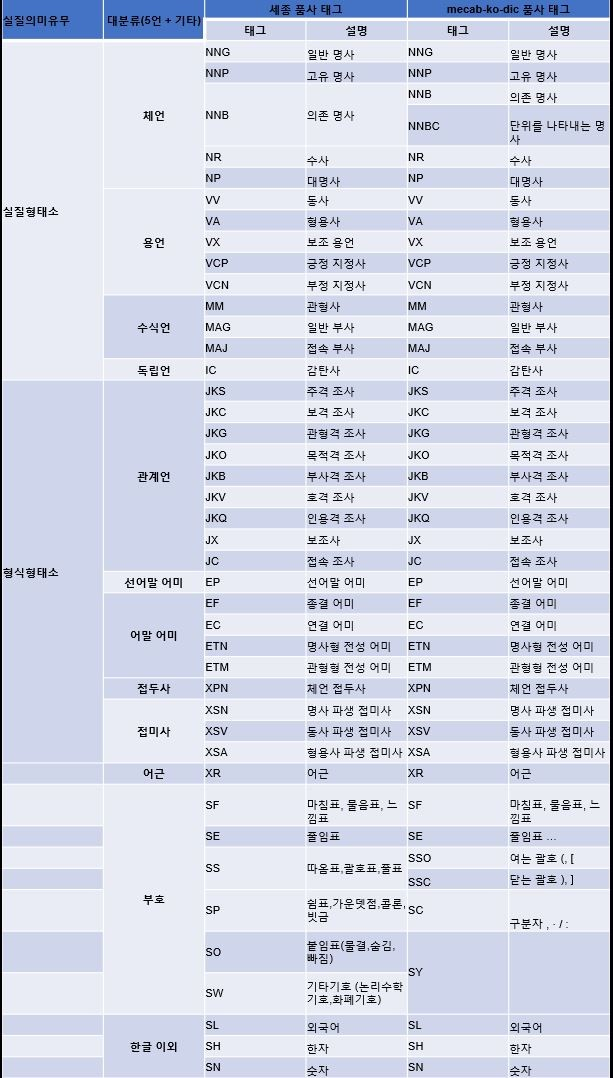

In [146]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1CCF-D498

 C:\Users\S2민정S2\Desktop\빅콘 디렉터리

2020-08-23  오후 05:37    <DIR>          .
2020-08-23  오후 05:37    <DIR>          ..
2020-08-20  오후 08:11    <DIR>          .ipynb_checkpoints
2020-08-12  오후 09:36    <DIR>          01_제공데이터
2020-08-15  오후 12:15    <DIR>          02_평가데이터
2020-08-20  오전 02:04         1,862,228 0814_상품명 수작업.xlsx
2020-08-05  오후 04:36    <DIR>          2020 빅콘테스트 온라인 설명회 발표자료_수정_200731
2020-08-05  오후 03:50         5,563,561 2020 빅콘테스트 온라인 설명회 발표자료_수정_200731.zip
2020-08-05  오후 05:20         3,696,604 2020빅콘테스트 문제데이터(데이터분석분야-챔피언리그).zip
2020-08-16  오후 08:37            19,304 accumulator.py.xlsx
2020-08-20  오후 07:55         2,265,703 drive-download-20200820T105436Z-001.zip
2020-08-20  오전 02:04            44,907 item_meta_v02_0820.xlsx
2020-08-16  오후 08:38    <DIR>          labeling
2020-08-23  오후 05:28           134,886 mecab.webp
2020-08-20  오후 07:59           872,155 Prep_word.ipynb
2020-08-23  오후 05:37         1,317,241 Prep_word

In [147]:
df = pd.read_excel("sale_meta_v03_0820.xlsx")

In [148]:
df

,상품코드,상품명,상품군,판매단가,결제방법,상품명다시,단위,브랜드,옵션,종류,모델명,성별,NEW상품명,NEW상품코드
0,200944,[가이거] 블랙 에디션 다이아몬드 워치(남성용),잡화,178000,0,남성 블랙 에디션 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 남성 블랙 에디션 다이아몬드 워치,0
1,200942,[가이거] 블랙 에디션 다이아몬드 워치(남성용),잡화,178000,0,남성 블랙 에디션 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 남성 블랙 에디션 다이아몬드 워치,0
2,200948,무이자[가이거] 무빙스타 다이아몬드 워치,잡화,129000,2,무빙스타 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 무빙스타 다이아몬드 워치,1
3,200951,일시불[가이거] 무빙스타 다이아몬드 워치,잡화,119000,1,무빙스타 다이아몬드 워치,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 무빙스타 다이아몬드 워치,1
4,200946,[무이자] 가이거 무빙스타 다이아몬드 워치+보석함,잡화,119000,2,무빙스타 다이아몬드 워치 + 보석함,NaN,가이거,NaN,악세서리,NaN,NaN,가이거 무빙스타 다이아몬드 워치 + 보석함,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,200013,AAB의 든든한 콩국수,농수축,39900,0,AAB의 든든한 콩국수,NaN,NaN,NaN,간편식품,NaN,NaN,AAB의 든든한 콩국수,1359
2038,200014,AAB의 소곱창전골 800g x 8팩,농수축,55900,0,AAB의 소곱창 전골,"800g, 8팩",NaN,NaN,간편식품,NaN,NaN,AAB의 소곱창 전골 800g 8팩,1360
2039,200033,AAE LA갈비 7팩,농수축,69900,0,AAE LA 갈비,7팩,NaN,NaN,육류,NaN,NaN,AAE LA 갈비 7팩,1361
2040,202115,IH 옛 가마솥 세트,주방,62000,0,IH 옛 가마솥 세트,NaN,NaN,NaN,NaN,NaN,NaN,IH 옛 가마솥 세트,1362


# Tokenize

In [149]:
tagger=Mecab()

In [150]:
df["토큰"] = df['NEW상품명'].apply(lambda x : tagger.pos(x))

In [151]:
df['NEW상품명'].apply(lambda x : tagger.nouns(x))

0       [가이거, 남성, 블랙, 에디션, 다이아몬드, 워치]
1       [가이거, 남성, 블랙, 에디션, 다이아몬드, 워치]
2            [가이거, 무빙, 스타, 다이아몬드, 워치]
3            [가이거, 무빙, 스타, 다이아몬드, 워치]
4       [가이거, 무빙, 스타, 다이아몬드, 워치, 보석함]
                    ...              
2037                            [콩국수]
2038                   [소곱, 창, 전골, 팩]
2039                          [갈비, 팩]
2040                        [가마솥, 세트]
2041                [근육통, 완화, 동전, 패치]
Name: NEW상품명, Length: 2042, dtype: object

In [152]:
df['NEW상품명'].apply(lambda x : tagger.pos(x))

0       [(가이거, NNP), (남성, NNG), (블랙, NNG), (에디션, NNP),...
1       [(가이거, NNP), (남성, NNG), (블랙, NNG), (에디션, NNP),...
2       [(가이거, NNP), (무빙, NNG), (스타, NNG), (다이아몬드, NNP...
3       [(가이거, NNP), (무빙, NNG), (스타, NNG), (다이아몬드, NNP...
4       [(가이거, NNP), (무빙, NNG), (스타, NNG), (다이아몬드, NNP...
                              ...                        
2037    [(AAB, SL), (의, JKG), (든든, XR), (한, XSA+ETM), ...
2038    [(AAB, SL), (의, JKG), (소곱, NNG), (창, NNG), (전골...
2039    [(AAE, SL), (LA, SL), (갈비, NNG), (7, SN), (팩, ...
2040           [(IH, SL), (옛, MM), (가마솥, NNG), (세트, NNG)]
2041    [(OK, SL), (근육통, NNG), (완화, NNG), (동전, NNG), (...
Name: NEW상품명, Length: 2042, dtype: object

In [153]:
test_df = df[["NEW상품명", "토큰"]]

In [154]:
test_df

,NEW상품명,토큰
0,가이거 남성 블랙 에디션 다이아몬드 워치,"[(가이거, NNP), (남성, NNG), (블랙, NNG), (에디션, NNP),..."
1,가이거 남성 블랙 에디션 다이아몬드 워치,"[(가이거, NNP), (남성, NNG), (블랙, NNG), (에디션, NNP),..."
2,가이거 무빙스타 다이아몬드 워치,"[(가이거, NNP), (무빙, NNG), (스타, NNG), (다이아몬드, NNP..."
3,가이거 무빙스타 다이아몬드 워치,"[(가이거, NNP), (무빙, NNG), (스타, NNG), (다이아몬드, NNP..."
4,가이거 무빙스타 다이아몬드 워치 + 보석함,"[(가이거, NNP), (무빙, NNG), (스타, NNG), (다이아몬드, NNP..."
...,...,...
2037,AAB의 든든한 콩국수,"[(AAB, SL), (의, JKG), (든든, XR), (한, XSA+ETM), ..."
2038,AAB의 소곱창 전골 800g 8팩,"[(AAB, SL), (의, JKG), (소곱, NNG), (창, NNG), (전골..."
2039,AAE LA 갈비 7팩,"[(AAE, SL), (LA, SL), (갈비, NNG), (7, SN), (팩, ..."
2040,IH 옛 가마솥 세트,"[(IH, SL), (옛, MM), (가마솥, NNG), (세트, NNG)]"


In [155]:
test_df.to_excel("안녕.xlsx",encoding = "UTF-8")

FileCreateError: [Errno 13] Permission denied: '안녕.xlsx'

In [ ]:
#토크나이징
for i in range(len(df)):
    print((df['NEW상품명'].iloc[i]))
    print(tagger.pos(df['NEW상품명'].iloc[i]))


In [156]:
def make_corpus(df):
    corpus = []
    for i in range(len(df)):
        corpus.append(['/'.join(p) for p in tagger.pos(df['상품명다시'].iloc[i]) if p[1] in tag_N])
    return corpus


In [157]:
# 토큰 모음집 만들기
corpus = make_corpus(df)


In [158]:
corpus

[['남성/NNG', '블랙/NNG', '에디션/NNP', '다이아몬드/NNP', '워치/NNP'],
 ['남성/NNG', '블랙/NNG', '에디션/NNP', '다이아몬드/NNP', '워치/NNP'],
 ['무빙/NNG', '스타/NNG', '다이아몬드/NNP', '워치/NNP'],
 ['무빙/NNG', '스타/NNG', '다이아몬드/NNP', '워치/NNP'],
 ['무빙/NNG', '스타/NNG', '다이아몬드/NNP', '워치/NNP', '보석함/NNG'],
 ['무빙/NNG', '스타/NNG', '다이아몬드/NNP', '워치/NNP', '보석함/NNG'],
 ['여성/NNG', '블랙/NNG', '에디션/NNP', '다이아몬드/NNP', '워치/NNP'],
 ['여성/NNG', '블랙/NNG', '에디션/NNP', '다이아몬드/NNP', '워치/NNP'],
 ['제니스/NNP', '시계/NNG', '주얼/NNG', '리세트/NNP'],
 ['제니스/NNP', '시계/NNG', '주얼/NNG', '리세트/NNP'],
 ['콘체르토/NNG', '다이아몬드/NNP', '워치/NNP', '주/NNP', '얼라/NNG'],
 ['콘체르토/NNG', '다이아몬드/NNP', '워치/NNP', '주/NNP', '얼라/NNG'],
 ['프리미엄/NNG', '에디션/NNP', '남성/NNG', '면도기/NNG'],
 ['차량/NNG', '공기/NNG', '청정기/NNP'],
 ['레모/NNP', 'S/SL', '산/NNG'],
 ['카로/NNG', '여행/NNG', '가방/NNG', '세트/NNG'],
 ['석류/NNG', '100/SN'],
 ['석류/NNG', '100/SN'],
 ['장/NNG', '건강/NNG', '유산균/NNG'],
 ['티/NNG', '포트/NNG'],
 ['티/NNG', '포트/NNG'],
 ['더블/NNG', 'G/SL', '오버/NNG', '선글라스/NNG'],
 ['더블/NNG', 'G/SL', '오버/NNG', '선글라스/NNG'],

In [159]:
len(corpus)

2042

# W2V_SkipGram

In [160]:
# module import
from gensim.models import Word2Vec, fasttext

# input format : [["my", "name", "is", "jamie"], ["jamie", "is", "cute"]]
# size : 임베딩 차원
# window : 윈도우 사이즈
# min_count : 고려할 단어의 최소 빈도 기준
# workers : cpu core 수
# iter : 반복 학습 횟수(epoch)
# sg : 0 -> CBOW, 1 -> Skip-Gram
# CBOW_model - Word2Vec(corpus, size=2, window=2, min_count=2, workers=1, iter=1000, sg=1)

In [161]:
#임베딩(w2v_skipgram)모델 생성
Skip_Gram_model = Word2Vec(corpus, size=2, window=3, min_count=1, workers=1, iter=1000, sg=1)

In [162]:
#index2word
words = Skip_Gram_model.wv.index2word #one-hot encoding알아서 해줌 
words

['여성/NNG',
 '세트/NNG',
 '남성/NNG',
 '패키지/NNG',
 'TV/SL',
 '브라/NNP',
 '울트라/NNG',
 'HD/SL',
 '에어컨/NNG',
 '팬츠/NNG',
 '티셔츠/NNG',
 '팬티/NNG',
 '백/NNP',
 '침대/NNG',
 '코트/NNG',
 '썸머/NNP',
 '침구/NNG',
 '소가죽/NNG',
 '기모/NNG',
 '패딩/NNG',
 '멀티/NNG',
 '탑/NNG',
 '풀/NNG',
 '드로즈/NNP',
 '18/SN',
 '손질/NNG',
 '트/NNG',
 '2/SN',
 'UHD/SL',
 '매트/NNG',
 'LED/SL',
 '벽걸이/NNG',
 '풍기/NNG',
 '인견/NNG',
 '국내/NNG',
 '롱/NNG',
 '컬렉션/NNG',
 '카이만/NNG',
 '백/NR',
 '웜/NNG',
 '티/NNG',
 '크로스/NNP',
 '에디션/NNP',
 '화이트/NNP',
 '니트/NNG',
 '풀스/NNG',
 '숄더백/NNG',
 '에어/NNP',
 '에어/NNG',
 '전기밥솥/NNG',
 '냉장고/NNG',
 '토트백/NNG',
 '업/NNG',
 '킹/NNP',
 '슬립/NNG',
 'k/SL',
 '리얼/NNG',
 '수트/NNP',
 '블/NNG',
 '코튼/NNG',
 '데님/NNG',
 '압력/NNG',
 '밥솥/NNG',
 '청소기/NNG',
 '스탠드/NNG',
 '소프트/NNG',
 '골드/NNP',
 'IH/SL',
 '소파/NNG',
 '더블/NNG',
 '핏/NNG',
 '스텐/NNG',
 '무선/NNG',
 '뉴/NNG',
 '쉐이/NNP',
 '핑/NNP',
 '트랙/NNG',
 '팔찌/NNG',
 '카페/NNG',
 '홈/NNG',
 '밍크/NNG',
 '1/SN',
 '자동/NNG',
 '냄비/NNG',
 '워킹/NNG',
 '3/SN',
 'K/SL',
 '폴로셔츠/NNG',
 '엠/NNG',
 '보/NNG',
 '란/NNG',
 '쿨/NNG',


In [163]:
len(words)

1501

In [164]:
# text 토큰 임베딩 벡터
vectors = Skip_Gram_model.wv.vectors
vectors

array([[-0.5929132 ,  0.94008136],
       [ 0.13614875,  0.7508047 ],
       [-0.39580876,  0.8683355 ],
       ...,
       [ 1.272627  ,  1.9912281 ],
       [ 1.2845038 ,  1.9998531 ],
       [ 1.335197  ,  2.0497658 ]], dtype=float32)

In [165]:
vectors.shape

(1501, 2)

In [166]:
# 토큰과 벡터 zip
Skip_Gram_model_result = dict(zip(words, vectors))

In [167]:
# 유사도 top5
Skip_Gram_model.most_similar('세트/NNG', topn=5)  #세트 토큰과 유사한 top5개 보기  #word2vec 코사인 유사도!

[('스톨/NNG', 0.9999999403953552),
 ('고구마/NNG', 0.9999998211860657),
 ('퍼스트/NNG', 0.9999988079071045),
 ('리모컨/NNG', 0.9999972581863403),
 ('자켓/NNG', 0.9999967813491821)]

In [168]:
import pandas as pd
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,여성/NNG,-0.592913,0.940081
1,세트/NNG,0.136149,0.750805
2,남성/NNG,-0.395809,0.868335
3,패키지/NNG,-0.621745,0.951499
4,TV/SL,1.963768,2.583087
...,...,...,...
1496,AAE/SL,0.981472,1.721492
1497,OK/SL,1.290461,2.045945
1498,근육통/NNG,1.272627,1.991228
1499,완화/NNG,1.284504,1.999853


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


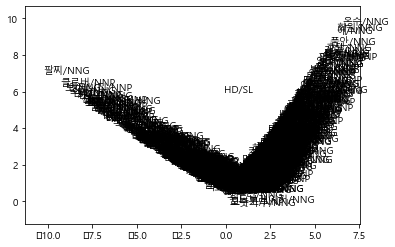

In [169]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning) 
plt.rc('font', family='Malgun Gothic')

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()

# W2V_CBOW

In [170]:
#임베딩(w2v_CBOW)모델 생성
CBOW_model = Word2Vec(corpus, size=2, window=3, min_count=1, workers=1, iter=1000, sg=0)

In [171]:
#index2word
words_C = CBOW_model.wv.index2word #one-hot encoding알아서 해줌 
words_C

['여성/NNG',
 '세트/NNG',
 '남성/NNG',
 '패키지/NNG',
 'TV/SL',
 '브라/NNP',
 '울트라/NNG',
 'HD/SL',
 '에어컨/NNG',
 '팬츠/NNG',
 '티셔츠/NNG',
 '팬티/NNG',
 '백/NNP',
 '침대/NNG',
 '코트/NNG',
 '썸머/NNP',
 '침구/NNG',
 '소가죽/NNG',
 '기모/NNG',
 '패딩/NNG',
 '멀티/NNG',
 '탑/NNG',
 '풀/NNG',
 '드로즈/NNP',
 '18/SN',
 '손질/NNG',
 '트/NNG',
 '2/SN',
 'UHD/SL',
 '매트/NNG',
 'LED/SL',
 '벽걸이/NNG',
 '풍기/NNG',
 '인견/NNG',
 '국내/NNG',
 '롱/NNG',
 '컬렉션/NNG',
 '카이만/NNG',
 '백/NR',
 '웜/NNG',
 '티/NNG',
 '크로스/NNP',
 '에디션/NNP',
 '화이트/NNP',
 '니트/NNG',
 '풀스/NNG',
 '숄더백/NNG',
 '에어/NNP',
 '에어/NNG',
 '전기밥솥/NNG',
 '냉장고/NNG',
 '토트백/NNG',
 '업/NNG',
 '킹/NNP',
 '슬립/NNG',
 'k/SL',
 '리얼/NNG',
 '수트/NNP',
 '블/NNG',
 '코튼/NNG',
 '데님/NNG',
 '압력/NNG',
 '밥솥/NNG',
 '청소기/NNG',
 '스탠드/NNG',
 '소프트/NNG',
 '골드/NNP',
 'IH/SL',
 '소파/NNG',
 '더블/NNG',
 '핏/NNG',
 '스텐/NNG',
 '무선/NNG',
 '뉴/NNG',
 '쉐이/NNP',
 '핑/NNP',
 '트랙/NNG',
 '팔찌/NNG',
 '카페/NNG',
 '홈/NNG',
 '밍크/NNG',
 '1/SN',
 '자동/NNG',
 '냄비/NNG',
 '워킹/NNG',
 '3/SN',
 'K/SL',
 '폴로셔츠/NNG',
 '엠/NNG',
 '보/NNG',
 '란/NNG',
 '쿨/NNG',


In [172]:
len(words_C)

1501

CBOW

In [173]:
# text 토큰 임베딩 벡터
vectors_C = CBOW_model.wv.vectors
vectors_C

array([[-3.1501777 ,  0.02959099],
       [-0.06929573,  0.34488252],
       [-2.6296859 ,  0.06907889],
       ...,
       [ 0.30808926,  1.4974433 ],
       [ 0.37199932,  1.5857896 ],
       [ 0.46671712,  1.7918446 ]], dtype=float32)

In [174]:
vectors_C.shape

(1501, 2)

In [175]:
# 토큰과 벡터 zip
CBOW_model_result = dict(zip(words_C, vectors_C))

In [176]:
# 유사도 top5
CBOW_model.most_similar('세트/NNG', topn=5)  #세트 토큰과 유사한 top5개 보기  #word2vec 코사인 유사도!

[('원적외선/NNG', 0.9999995231628418),
 ('복장/NNG', 0.999999463558197),
 ('브/NNP', 0.9999983310699463),
 ('크림/NNG', 0.9999916553497314),
 ('듀얼/NNP', 0.9999588131904602)]

In [177]:
import pandas as pd
w2v_c_df = pd.DataFrame(vectors_C, columns = ['x1', 'x2'])
w2v_c_df['word'] = words_C
w2v_c_df = w2v_c_df[['word', 'x1', 'x2']]
w2v_c_df

,word,x1,x2
0,여성/NNG,-3.150178,0.029591
1,세트/NNG,-0.069296,0.344883
2,남성/NNG,-2.629686,0.069079
3,패키지/NNG,-3.133933,-0.029921
4,TV/SL,2.451471,5.832011
...,...,...,...
1496,AAE/SL,0.345136,1.603564
1497,OK/SL,-0.018741,0.826044
1498,근육통/NNG,0.308089,1.497443
1499,완화/NNG,0.371999,1.585790


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


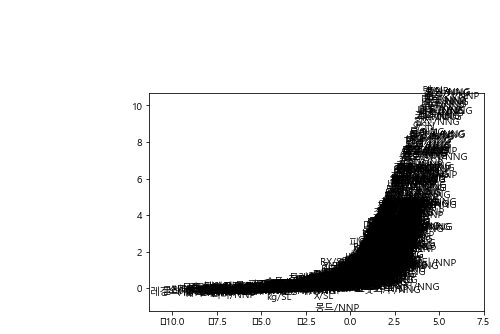

In [178]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
warnings.filterwarnings("ignore", category=DeprecationWarning) 
plt.rc('font', family='Malgun Gothic')

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_c_df['word'], w2v_c_df['x1'], w2v_c_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (100,100)

plt.show()

# 차원을 넓혀보자

In [211]:
from tqdm import tqdm_notebook, tqdm
from numpy import dot
from numpy.linalg import norm
def sim_all (model, dim, name):
    def cos_sim(A, B):
           return dot(A, B)/(norm(A)*norm(B))
    
    sim_all = []
    if model == "skip" :
        #임베딩(w2v_skipgram)모델 생성
        Skip_Gram_model_tmp = Word2Vec(corpus, size=dim, window=3, min_count=1, workers=1, iter=500, sg=1)
        words_S_tmp = Skip_Gram_model_tmp.wv.index2word #one-hot encoding알아서 해줌 
        vectors_tmp = Skip_Gram_model_tmp.wv.vectors
        vec = vectors_tmp[words_S_5.index(name)]
        
        #print((Skip_Gram_model_tmp.most_similar(name, topn=10)))  #토큰과 유사한 top5개 보기  #word2vec 코사인 유사도!
    else :
        #임베딩(w2v_skipgram)모델 생성
        CBOW_model_tmp = Word2Vec(corpus, size=dim, window=3, min_count=1, workers=1, iter=500  , sg=0)
        words_C_tmp = CBOW_model_tmp.wv.index2word #one-hot encoding알아서 해줌 
        vectors_tmp = CBOW_model_tmp.wv.vectors
        vec = vectors_tmp[words_C_tmp.index(name)]
              
        #print((CBOW_model_tmp.most_similar(name, topn=10)))  #토큰과 유사한 top5개 보기  #word2vec 코사인 유사도!

   
    for j in tqdm(range(len(vectors_tmp))):
        sim_all.append(cos_sim(vec,vectors_tmp[j]))
    sim_all.sort(reverse = True)

    return sim_all
            

In [189]:
sr = sim_all('skip', 3, '코트/NNG')

[('부츠/NNG', 0.9999909400939941), ('구스/NNP', 0.9999735355377197), ('에코/NNP', 0.9999685287475586), ('점퍼/NNG', 0.9999572038650513), ('킹/NNP', 0.9999380111694336), ('렌디/NNP', 0.9999210238456726), ('다운/NNG', 0.9998428225517273), ('통풍/NNG', 0.9998155236244202), ('자켓/NNG', 0.9997652769088745), ('쿠아트레/NNP', 0.999659538269043)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38590.24it/s]


In [212]:
sim_all('skip', 3, '코트/NNG')

100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 44264.49it/s]


[0.9999999,
 0.9999911,
 0.9999647,
 0.9999299,
 0.999919,
 0.99987733,
 0.9998676,
 0.9998474,
 0.99983555,
 0.9998128,
 0.99979156,
 0.99978894,
 0.9997857,
 0.9997547,
 0.9997494,
 0.99972427,
 0.9997154,
 0.9996758,
 0.9996428,
 0.9995549,
 0.99938613,
 0.99936444,
 0.9993294,
 0.99932396,
 0.99931717,
 0.99926066,
 0.99921817,
 0.99915665,
 0.9991559,
 0.99913555,
 0.999125,
 0.9991245,
 0.9990626,
 0.9990555,
 0.99901557,
 0.9989731,
 0.9989378,
 0.998882,
 0.9987798,
 0.9986655,
 0.998599,
 0.9985952,
 0.9985885,
 0.9985427,
 0.9984789,
 0.99835145,
 0.9983136,
 0.9983034,
 0.998297,
 0.99822813,
 0.9981925,
 0.99783564,
 0.99782145,
 0.9976953,
 0.997682,
 0.99754614,
 0.997464,
 0.99744207,
 0.9974276,
 0.9974186,
 0.9971793,
 0.99710053,
 0.9970297,
 0.9969556,
 0.99691534,
 0.9966509,
 0.9965987,
 0.9963355,
 0.996174,
 0.99600923,
 0.99600065,
 0.99588364,
 0.995793,
 0.9956699,
 0.9955111,
 0.9953842,
 0.99517,
 0.99516356,
 0.9950579,
 0.9943686,
 0.9942607,
 0.993832,
 0

In [118]:
sr = pd.Series(sr)

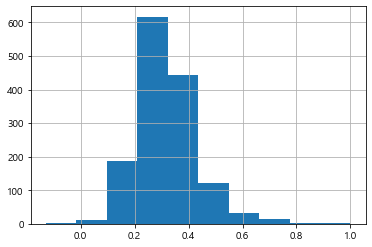

In [119]:
sr.hist()

In [180]:
for i in range(10,101):
    print("-------------------------------------")
    print(" num :", i)
    all_cos.append(sim_all('skip', i, '에어컨/NNG')[0])
    
    
    

-------------------------------------
 num : 10
[('위너/NNP', 0.927690863609314), ('무풍/NNP', 0.919761061668396), ('무풍/NNG', 0.9128512144088745), ('스탠드/NNG', 0.8643739819526672), ('쿡/NNP', 0.8552472591400146), ('양파/NNG', 0.8507867455482483), ('kg/SL', 0.8473151922225952), ('마늘/NNG', 0.8469960689544678), ('슬림/NNP', 0.8402114510536194), ('블랜더/NNG', 0.8377997875213623)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39606.00it/s]


-------------------------------------
 num : 11
[('위너/NNP', 0.9188814163208008), ('무풍/NNG', 0.9065372943878174), ('무풍/NNP', 0.9039505124092102), ('스탠드/NNG', 0.8448429107666016), ('way/SL', 0.8431624174118042), ('블랜더/NNG', 0.8386760950088501), ('kg/SL', 0.8288230895996094), ('슬림/NNP', 0.8284094333648682), ('양파/NNG', 0.8262620568275452), ('꿀잠/NNG', 0.8260236978530884)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37626.63it/s]


-------------------------------------
 num : 12
[('위너/NNP', 0.9095696210861206), ('무풍/NNG', 0.8923826813697815), ('무풍/NNP', 0.8857057094573975), ('스탠드/NNG', 0.8374528288841248), ('way/SL', 0.8365423679351807), ('블랜더/NNG', 0.8265253305435181), ('꿀잠/NNG', 0.824469268321991), ('매트리스/NNG', 0.8159468173980713), ('IN/SL', 0.8127813935279846), ('1/SN', 0.8100378513336182)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38589.06it/s]


-------------------------------------
 num : 13
[('무풍/NNG', 0.8917266130447388), ('위너/NNP', 0.8826289176940918), ('무풍/NNP', 0.8768230676651001), ('스탠드/NNG', 0.825606644153595), ('블랜더/NNG', 0.8118188977241516), ('IN/SL', 0.7989891171455383), ('송도순/NNP', 0.7967929840087891), ('way/SL', 0.792751669883728), ('맷돌/NNG', 0.7910873293876648), ('선풍기/NNG', 0.789220929145813)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 43002.19it/s]


-------------------------------------
 num : 14
[('위너/NNP', 0.905853271484375), ('무풍/NNP', 0.8874511122703552), ('무풍/NNG', 0.8821476697921753), ('스탠드/NNG', 0.8228274583816528), ('송도순/NNP', 0.8104393482208252), ('맷돌/NNG', 0.8081456422805786), ('선풍기/NNG', 0.7973576188087463), ('블랜더/NNG', 0.7972866296768188), ('슬림/NNP', 0.7927427291870117), ('IN/SL', 0.7920759320259094)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34206.57it/s]


-------------------------------------
 num : 15
[('무풍/NNG', 0.8909587264060974), ('위너/NNP', 0.8894790410995483), ('무풍/NNP', 0.8891566395759583), ('스탠드/NNG', 0.8238468766212463), ('선풍기/NNG', 0.8180158138275146), ('블랜더/NNG', 0.8024057149887085), ('맷돌/NNG', 0.798072338104248), ('템/NNG', 0.7970287799835205), ('슬림/NNP', 0.7813299894332886), ('송도순/NNP', 0.7778469324111938)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 43004.25it/s]


-------------------------------------
 num : 16
[('무풍/NNP', 0.8582265973091125), ('위너/NNP', 0.8577423095703125), ('무풍/NNG', 0.8450576066970825), ('선풍기/NNG', 0.8102245926856995), ('스탠드/NNG', 0.7978767156600952), ('템/NNG', 0.7951409816741943), ('슬림/NNP', 0.7846654653549194), ('굿/NNG', 0.7605360746383667), ('HG/SL', 0.7504342794418335), ('행거/NNG', 0.7461447715759277)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 45606.77it/s]


-------------------------------------
 num : 17
[('위너/NNP', 0.8595485091209412), ('무풍/NNP', 0.8552433252334595), ('무풍/NNG', 0.8331114649772644), ('선풍기/NNG', 0.7955058813095093), ('스탠드/NNG', 0.7907202839851379), ('템/NNG', 0.7814480662345886), ('슬림/NNP', 0.7616435289382935), ('IN/SL', 0.7546851634979248), ('굿/NNG', 0.7524547576904297), ('블랜더/NNG', 0.749235987663269)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38591.19it/s]


-------------------------------------
 num : 18
[('무풍/NNP', 0.8493772745132446), ('위너/NNP', 0.8447030782699585), ('무풍/NNG', 0.8330107927322388), ('선풍기/NNG', 0.7916103601455688), ('스탠드/NNG', 0.78763747215271), ('템/NNG', 0.7736988067626953), ('슬림/NNP', 0.7659999132156372), ('in/SL', 0.7606412172317505), ('IN/SL', 0.7572572827339172), ('블랜더/NNG', 0.7504492998123169)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37624.16it/s]


-------------------------------------
 num : 19
[('위너/NNP', 0.8534495830535889), ('무풍/NNP', 0.8440550565719604), ('무풍/NNG', 0.8282641172409058), ('선풍기/NNG', 0.7952631711959839), ('스탠드/NNG', 0.7849550247192383), ('in/SL', 0.7809412479400635), ('템/NNG', 0.7768700122833252), ('IN/SL', 0.7670862078666687), ('슬림/NNP', 0.7590324878692627), ('블랜더/NNG', 0.7587747573852539)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34999.56it/s]


-------------------------------------
 num : 20
[('위너/NNP', 0.8464915752410889), ('무풍/NNP', 0.8449106812477112), ('무풍/NNG', 0.8237006664276123), ('선풍기/NNG', 0.7974976301193237), ('스탠드/NNG', 0.7820903062820435), ('템/NNG', 0.7805044651031494), ('in/SL', 0.7780152559280396), ('IN/SL', 0.7586655020713806), ('블랜더/NNG', 0.7571724653244019), ('슬림/NNP', 0.7451788783073425)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39608.24it/s]


-------------------------------------
 num : 21
[('위너/NNP', 0.8505923748016357), ('무풍/NNP', 0.8453055620193481), ('무풍/NNG', 0.8247236013412476), ('선풍기/NNG', 0.8074241876602173), ('템/NNG', 0.7911174297332764), ('in/SL', 0.7837902903556824), ('스탠드/NNG', 0.770043134689331), ('IN/SL', 0.757320761680603), ('블랜더/NNG', 0.7488239407539368), ('1/SN', 0.7364294528961182)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 48550.20it/s]


-------------------------------------
 num : 22
[('위너/NNP', 0.8466445207595825), ('무풍/NNP', 0.8459552526473999), ('무풍/NNG', 0.8188914060592651), ('선풍기/NNG', 0.8001004457473755), ('템/NNG', 0.7795665264129639), ('in/SL', 0.7754738330841064), ('스탠드/NNG', 0.7617995142936707), ('IN/SL', 0.7532554864883423), ('블랜더/NNG', 0.7458575963973999), ('1/SN', 0.7302521467208862)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38590.24it/s]


-------------------------------------
 num : 23
[('위너/NNP', 0.8448126912117004), ('무풍/NNP', 0.8438211679458618), ('무풍/NNG', 0.813431978225708), ('선풍기/NNG', 0.8011913299560547), ('템/NNG', 0.7805216312408447), ('in/SL', 0.7700563669204712), ('스탠드/NNG', 0.7565369009971619), ('IN/SL', 0.7496370077133179), ('블랜더/NNG', 0.7473114132881165), ('1/SN', 0.7283960580825806)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34981.86it/s]


-------------------------------------
 num : 24
[('위너/NNP', 0.8398499488830566), ('무풍/NNP', 0.8392831087112427), ('무풍/NNG', 0.8155771493911743), ('선풍기/NNG', 0.798058271408081), ('템/NNG', 0.7769286036491394), ('in/SL', 0.7683262228965759), ('스탠드/NNG', 0.755865752696991), ('블랜더/NNG', 0.7546347975730896), ('IN/SL', 0.7479041814804077), ('1/SN', 0.7282328009605408)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36707.19it/s]


-------------------------------------
 num : 25
[('무풍/NNP', 0.8383260369300842), ('위너/NNP', 0.8307502865791321), ('무풍/NNG', 0.8134174346923828), ('선풍기/NNG', 0.7915690541267395), ('템/NNG', 0.7704944610595703), ('in/SL', 0.7620269656181335), ('스탠드/NNG', 0.7523319125175476), ('IN/SL', 0.7454848289489746), ('블랜더/NNG', 0.7433356642723083), ('1/SN', 0.7253628969192505)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32717.42it/s]


-------------------------------------
 num : 26
[('무풍/NNP', 0.8408925533294678), ('위너/NNP', 0.8263121843338013), ('무풍/NNG', 0.8142365217208862), ('선풍기/NNG', 0.8006328344345093), ('템/NNG', 0.7809066772460938), ('in/SL', 0.7652057409286499), ('스탠드/NNG', 0.7523336410522461), ('블랜더/NNG', 0.7449007630348206), ('IN/SL', 0.7435653805732727), ('1/SN', 0.7238066792488098)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36706.98it/s]


-------------------------------------
 num : 27
[('무풍/NNP', 0.8275896906852722), ('위너/NNP', 0.8233832120895386), ('무풍/NNG', 0.815498948097229), ('선풍기/NNG', 0.7965033054351807), ('템/NNG', 0.7796636819839478), ('in/SL', 0.762821614742279), ('스탠드/NNG', 0.7473617792129517), ('블랜더/NNG', 0.745885968208313), ('IN/SL', 0.7396847009658813), ('1/SN', 0.7199252843856812)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34204.52it/s]


-------------------------------------
 num : 28
[('무풍/NNP', 0.8247671127319336), ('위너/NNP', 0.818305253982544), ('무풍/NNG', 0.8084341883659363), ('선풍기/NNG', 0.7829176187515259), ('템/NNG', 0.7605167627334595), ('in/SL', 0.7463342547416687), ('블랜더/NNG', 0.7277427911758423), ('스탠드/NNG', 0.7277236580848694), ('IN/SL', 0.7201720476150513), ('홈/NNG', 0.7133319973945618)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 31355.18it/s]


-------------------------------------
 num : 29
[('무풍/NNP', 0.8220332860946655), ('위너/NNP', 0.8202221393585205), ('무풍/NNG', 0.8097836375236511), ('선풍기/NNG', 0.7811046838760376), ('템/NNG', 0.7562180757522583), ('in/SL', 0.7430406808853149), ('블랜더/NNG', 0.7265506982803345), ('스탠드/NNG', 0.7253191471099854), ('IN/SL', 0.7184897661209106), ('홈/NNG', 0.7104240655899048)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32021.17it/s]


-------------------------------------
 num : 30
[('위너/NNP', 0.8209265470504761), ('무풍/NNP', 0.8196624517440796), ('무풍/NNG', 0.8064313530921936), ('선풍기/NNG', 0.7808529138565063), ('템/NNG', 0.7552821040153503), ('in/SL', 0.731337308883667), ('스탠드/NNG', 0.7219713926315308), ('블랜더/NNG', 0.7203274369239807), ('IN/SL', 0.7190109491348267), ('홈/NNG', 0.7023475170135498)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 27364.42it/s]


-------------------------------------
 num : 31
[('위너/NNP', 0.8188186883926392), ('무풍/NNP', 0.8176779747009277), ('무풍/NNG', 0.8031443357467651), ('선풍기/NNG', 0.7778176069259644), ('템/NNG', 0.7514322996139526), ('in/SL', 0.7297666072845459), ('블랜더/NNG', 0.7198047637939453), ('IN/SL', 0.7163883447647095), ('스탠드/NNG', 0.7160906791687012), ('맷돌/NNG', 0.6941137313842773)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 20903.07it/s]


-------------------------------------
 num : 32
[('위너/NNP', 0.8171141743659973), ('무풍/NNP', 0.8154270052909851), ('무풍/NNG', 0.8017661571502686), ('선풍기/NNG', 0.7777197957038879), ('템/NNG', 0.7489548921585083), ('in/SL', 0.7268710732460022), ('스탠드/NNG', 0.7151866555213928), ('IN/SL', 0.7141494750976562), ('블랜더/NNG', 0.7123385667800903), ('맷돌/NNG', 0.6925448179244995)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39601.51it/s]


-------------------------------------
 num : 33
[('무풍/NNP', 0.8151170611381531), ('위너/NNP', 0.8124439120292664), ('무풍/NNG', 0.8017528653144836), ('선풍기/NNG', 0.7759565711021423), ('템/NNG', 0.7464266419410706), ('in/SL', 0.7259371876716614), ('블랜더/NNG', 0.7116179466247559), ('IN/SL', 0.7107142806053162), ('스탠드/NNG', 0.7100059390068054), ('맷돌/NNG', 0.6900262832641602)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39606.49it/s]


-------------------------------------
 num : 34
[('위너/NNP', 0.8141019344329834), ('무풍/NNP', 0.8131222724914551), ('무풍/NNG', 0.8001326322555542), ('선풍기/NNG', 0.7796273231506348), ('템/NNG', 0.7499449253082275), ('in/SL', 0.7253177165985107), ('IN/SL', 0.7134814262390137), ('스탠드/NNG', 0.7119908332824707), ('블랜더/NNG', 0.7082937359809875), ('1/SN', 0.6895493268966675)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 43000.73it/s]


-------------------------------------
 num : 35
[('무풍/NNP', 0.8131725788116455), ('위너/NNP', 0.8113742470741272), ('무풍/NNG', 0.7998107671737671), ('선풍기/NNG', 0.7780316472053528), ('템/NNG', 0.7488715648651123), ('in/SL', 0.7227745056152344), ('스탠드/NNG', 0.7143127918243408), ('IN/SL', 0.711978018283844), ('블랜더/NNG', 0.7087595462799072), ('1/SN', 0.6870425939559937)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 41806.84it/s]


-------------------------------------
 num : 36
[('무풍/NNP', 0.8133209347724915), ('위너/NNP', 0.8099403381347656), ('무풍/NNG', 0.7980955839157104), ('선풍기/NNG', 0.7761948704719543), ('템/NNG', 0.7471343874931335), ('in/SL', 0.7187788486480713), ('스탠드/NNG', 0.7144221663475037), ('IN/SL', 0.7122700810432434), ('블랜더/NNG', 0.7059156894683838), ('맷돌/NNG', 0.6858228445053101)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 25083.87it/s]


-------------------------------------
 num : 37
[('무풍/NNP', 0.8060708045959473), ('위너/NNP', 0.8010051250457764), ('무풍/NNG', 0.7906752824783325), ('선풍기/NNG', 0.7719913125038147), ('템/NNG', 0.7437711358070374), ('in/SL', 0.7161715030670166), ('스탠드/NNG', 0.7124695777893066), ('IN/SL', 0.70478355884552), ('블랜더/NNG', 0.7019750475883484), ('맷돌/NNG', 0.6811904311180115)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37621.68it/s]


-------------------------------------
 num : 38
[('무풍/NNP', 0.8085035681724548), ('위너/NNP', 0.8036015033721924), ('무풍/NNG', 0.790783166885376), ('선풍기/NNG', 0.7744925022125244), ('템/NNG', 0.7464326024055481), ('in/SL', 0.7174144983291626), ('스탠드/NNG', 0.7156376838684082), ('블랜더/NNG', 0.7066574692726135), ('IN/SL', 0.7046025991439819), ('맷돌/NNG', 0.6852741241455078)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 47033.36it/s]


-------------------------------------
 num : 39
[('무풍/NNP', 0.807266116142273), ('위너/NNP', 0.8045816421508789), ('무풍/NNG', 0.7927026748657227), ('선풍기/NNG', 0.7762699127197266), ('템/NNG', 0.7477699518203735), ('스탠드/NNG', 0.7167646884918213), ('in/SL', 0.7161585092544556), ('IN/SL', 0.7092980146408081), ('블랜더/NNG', 0.7058638334274292), ('맷돌/NNG', 0.6881330609321594)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37625.06it/s]


-------------------------------------
 num : 40
[('무풍/NNP', 0.8089100122451782), ('위너/NNP', 0.8070799112319946), ('무풍/NNG', 0.7948261499404907), ('선풍기/NNG', 0.7763623595237732), ('템/NNG', 0.7476855516433716), ('in/SL', 0.7197943329811096), ('스탠드/NNG', 0.7171000242233276), ('IN/SL', 0.7111819982528687), ('블랜더/NNG', 0.7090021371841431), ('맷돌/NNG', 0.689813494682312)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37623.48it/s]


-------------------------------------
 num : 41
[('위너/NNP', 0.8078525066375732), ('무풍/NNP', 0.8053120374679565), ('무풍/NNG', 0.7911860942840576), ('선풍기/NNG', 0.7753617763519287), ('템/NNG', 0.7451432943344116), ('in/SL', 0.7175583243370056), ('스탠드/NNG', 0.7156341075897217), ('IN/SL', 0.7094069123268127), ('블랜더/NNG', 0.7061275243759155), ('맷돌/NNG', 0.6890838146209717)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36708.90it/s]


-------------------------------------
 num : 42
[('위너/NNP', 0.808273434638977), ('무풍/NNP', 0.8057036399841309), ('무풍/NNG', 0.7886010408401489), ('선풍기/NNG', 0.7760962247848511), ('템/NNG', 0.7455838918685913), ('in/SL', 0.7163652181625366), ('스탠드/NNG', 0.714840292930603), ('IN/SL', 0.7112854719161987), ('블랜더/NNG', 0.7017034888267517), ('맷돌/NNG', 0.6893599033355713)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 43001.02it/s]


-------------------------------------
 num : 43
[('위너/NNP', 0.8086428642272949), ('무풍/NNP', 0.8066476583480835), ('무풍/NNG', 0.788425862789154), ('선풍기/NNG', 0.7790906429290771), ('템/NNG', 0.7481514811515808), ('in/SL', 0.7177905440330505), ('스탠드/NNG', 0.7165480256080627), ('IN/SL', 0.7118381261825562), ('블랜더/NNG', 0.6974203586578369), ('맷돌/NNG', 0.6892992258071899)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 47031.95it/s]


-------------------------------------
 num : 44
[('위너/NNP', 0.809958279132843), ('무풍/NNP', 0.8087809085845947), ('무풍/NNG', 0.7898515462875366), ('선풍기/NNG', 0.7796735763549805), ('템/NNG', 0.7485593557357788), ('in/SL', 0.7207705974578857), ('스탠드/NNG', 0.7145889401435852), ('IN/SL', 0.714285135269165), ('블랜더/NNG', 0.6969916224479675), ('맷돌/NNG', 0.6936886310577393)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36706.12it/s]


-------------------------------------
 num : 45
[('위너/NNP', 0.8084603548049927), ('무풍/NNP', 0.8068841695785522), ('무풍/NNG', 0.7889812588691711), ('선풍기/NNG', 0.7791804671287537), ('템/NNG', 0.7478908896446228), ('in/SL', 0.7187191247940063), ('스탠드/NNG', 0.7127940654754639), ('IN/SL', 0.7119659185409546), ('블랜더/NNG', 0.6996460556983948), ('맷돌/NNG', 0.6909654140472412)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35000.14it/s]


-------------------------------------
 num : 46
[('위너/NNP', 0.8098223805427551), ('무풍/NNP', 0.8069860935211182), ('무풍/NNG', 0.7902352809906006), ('선풍기/NNG', 0.7804586887359619), ('템/NNG', 0.7480813264846802), ('in/SL', 0.7186803221702576), ('IN/SL', 0.7106130719184875), ('스탠드/NNG', 0.7100019454956055), ('블랜더/NNG', 0.693932294845581), ('맷돌/NNG', 0.6907800436019897)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 47030.55it/s]


-------------------------------------
 num : 47
[('위너/NNP', 0.8094794154167175), ('무풍/NNP', 0.8051446676254272), ('무풍/NNG', 0.7894873023033142), ('선풍기/NNG', 0.7799013257026672), ('템/NNG', 0.7473534345626831), ('in/SL', 0.7165991067886353), ('IN/SL', 0.7097074389457703), ('스탠드/NNG', 0.7090621590614319), ('블랜더/NNG', 0.692810595035553), ('맷돌/NNG', 0.6899976134300232)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32022.80it/s]


-------------------------------------
 num : 48
[('위너/NNP', 0.8084977865219116), ('무풍/NNP', 0.8021308183670044), ('무풍/NNG', 0.7876991033554077), ('선풍기/NNG', 0.7817970514297485), ('템/NNG', 0.7490326762199402), ('스탠드/NNG', 0.7118712067604065), ('IN/SL', 0.7107559442520142), ('in/SL', 0.7099288702011108), ('맷돌/NNG', 0.6929497718811035), ('블랜더/NNG', 0.6863074898719788)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 26402.61it/s]


-------------------------------------
 num : 49
[('위너/NNP', 0.8092513084411621), ('무풍/NNP', 0.799964189529419), ('무풍/NNG', 0.7859052419662476), ('선풍기/NNG', 0.783044695854187), ('템/NNG', 0.7499057054519653), ('스탠드/NNG', 0.711688756942749), ('IN/SL', 0.708884596824646), ('in/SL', 0.7059341073036194), ('맷돌/NNG', 0.6941688656806946), ('블랜더/NNG', 0.6826494932174683)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32021.82it/s]


-------------------------------------
 num : 50
[('위너/NNP', 0.8088147640228271), ('무풍/NNP', 0.8006910085678101), ('무풍/NNG', 0.7876937389373779), ('선풍기/NNG', 0.7823839783668518), ('템/NNG', 0.7493727803230286), ('스탠드/NNG', 0.7105689644813538), ('IN/SL', 0.7069393992424011), ('in/SL', 0.7045884132385254), ('맷돌/NNG', 0.6946802139282227), ('블랜더/NNG', 0.6830986738204956)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 43001.61it/s]


-------------------------------------
 num : 51
[('위너/NNP', 0.8085711598396301), ('무풍/NNP', 0.7997394800186157), ('무풍/NNG', 0.7864711284637451), ('선풍기/NNG', 0.7822545170783997), ('템/NNG', 0.7492505311965942), ('스탠드/NNG', 0.7099034190177917), ('IN/SL', 0.7067900896072388), ('in/SL', 0.7034152746200562), ('맷돌/NNG', 0.694671630859375), ('블랜더/NNG', 0.6832743883132935)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34197.46it/s]


-------------------------------------
 num : 52
[('위너/NNP', 0.8083487749099731), ('무풍/NNP', 0.7992327213287354), ('무풍/NNG', 0.785840630531311), ('선풍기/NNG', 0.7811223268508911), ('템/NNG', 0.7481793761253357), ('스탠드/NNG', 0.7096051573753357), ('IN/SL', 0.7044516205787659), ('in/SL', 0.7025293111801147), ('맷돌/NNG', 0.6936394572257996), ('블랜더/NNG', 0.6864981055259705)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39605.00it/s]


-------------------------------------
 num : 53
[('위너/NNP', 0.808268666267395), ('무풍/NNP', 0.7977328896522522), ('무풍/NNG', 0.7845472097396851), ('선풍기/NNG', 0.7786884903907776), ('템/NNG', 0.7450400590896606), ('스탠드/NNG', 0.7068528532981873), ('in/SL', 0.7043030261993408), ('IN/SL', 0.7036716938018799), ('맷돌/NNG', 0.6928479075431824), ('블랜더/NNG', 0.6871455311775208)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 33445.52it/s]


-------------------------------------
 num : 54
[('위너/NNP', 0.8069610595703125), ('무풍/NNP', 0.7966697216033936), ('무풍/NNG', 0.7842806577682495), ('선풍기/NNG', 0.7779412269592285), ('템/NNG', 0.7433965802192688), ('스탠드/NNG', 0.705447793006897), ('IN/SL', 0.7020782232284546), ('in/SL', 0.700328528881073), ('맷돌/NNG', 0.6988351345062256), ('블랜더/NNG', 0.6809467077255249)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 33445.16it/s]


-------------------------------------
 num : 55
[('위너/NNP', 0.8067998886108398), ('무풍/NNP', 0.7957379221916199), ('무풍/NNG', 0.7833148837089539), ('선풍기/NNG', 0.778177797794342), ('템/NNG', 0.7435556054115295), ('스탠드/NNG', 0.7043293714523315), ('IN/SL', 0.700344979763031), ('in/SL', 0.700332522392273), ('맷돌/NNG', 0.6971453428268433), ('블랜더/NNG', 0.679904580116272)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34203.22it/s]


-------------------------------------
 num : 56
[('위너/NNP', 0.8068362474441528), ('무풍/NNP', 0.7952290177345276), ('무풍/NNG', 0.7824211120605469), ('선풍기/NNG', 0.7784436345100403), ('템/NNG', 0.7431268692016602), ('스탠드/NNG', 0.7040297389030457), ('IN/SL', 0.6997635364532471), ('in/SL', 0.6992517113685608), ('맷돌/NNG', 0.6965605020523071), ('블랜더/NNG', 0.67899090051651)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 41807.12it/s]


-------------------------------------
 num : 57
[('위너/NNP', 0.8061000108718872), ('무풍/NNP', 0.7942968606948853), ('무풍/NNG', 0.7819505929946899), ('선풍기/NNG', 0.7757217288017273), ('템/NNG', 0.741533637046814), ('스탠드/NNG', 0.7044214010238647), ('in/SL', 0.7014495134353638), ('IN/SL', 0.6980112791061401), ('맷돌/NNG', 0.6927604079246521), ('블랜더/NNG', 0.6843600869178772)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38590.95it/s]


-------------------------------------
 num : 58
[('위너/NNP', 0.8067254424095154), ('무풍/NNP', 0.7954099178314209), ('무풍/NNG', 0.7822278141975403), ('선풍기/NNG', 0.776190996170044), ('템/NNG', 0.74199378490448), ('스탠드/NNG', 0.7027161121368408), ('IN/SL', 0.698888897895813), ('in/SL', 0.6981041431427002), ('맷돌/NNG', 0.6923496723175049), ('블랜더/NNG', 0.6879575252532959)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 30099.69it/s]


-------------------------------------
 num : 59
[('위너/NNP', 0.808958113193512), ('무풍/NNP', 0.7977402210235596), ('무풍/NNG', 0.7837533354759216), ('선풍기/NNG', 0.7804051041603088), ('템/NNG', 0.7455597519874573), ('스탠드/NNG', 0.7050726413726807), ('IN/SL', 0.7009036540985107), ('in/SL', 0.7002010941505432), ('블랜더/NNG', 0.6927773952484131), ('맷돌/NNG', 0.690031886100769)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 40677.46it/s]


-------------------------------------
 num : 60
[('위너/NNP', 0.8095870614051819), ('무풍/NNP', 0.7949939370155334), ('무풍/NNG', 0.784538984298706), ('선풍기/NNG', 0.7805472016334534), ('템/NNG', 0.7456504702568054), ('스탠드/NNG', 0.7064234018325806), ('IN/SL', 0.7019830346107483), ('in/SL', 0.7004339098930359), ('블랜더/NNG', 0.6927833557128906), ('맷돌/NNG', 0.6890488862991333)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 26875.09it/s]


-------------------------------------
 num : 61
[('위너/NNP', 0.8101848363876343), ('무풍/NNP', 0.7943729162216187), ('무풍/NNG', 0.7848119735717773), ('선풍기/NNG', 0.7808446884155273), ('템/NNG', 0.7454215288162231), ('스탠드/NNG', 0.7053045034408569), ('in/SL', 0.7030258178710938), ('IN/SL', 0.7018729448318481), ('블랜더/NNG', 0.6967775821685791), ('맷돌/NNG', 0.6884900331497192)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39606.49it/s]


-------------------------------------
 num : 62
[('위너/NNP', 0.810479998588562), ('무풍/NNP', 0.7950743436813354), ('무풍/NNG', 0.7849673628807068), ('선풍기/NNG', 0.7807155847549438), ('템/NNG', 0.7451345920562744), ('스탠드/NNG', 0.7045804262161255), ('in/SL', 0.7026335597038269), ('IN/SL', 0.7012039422988892), ('블랜더/NNG', 0.6968803405761719), ('맷돌/NNG', 0.6892603635787964)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36706.33it/s]


-------------------------------------
 num : 63
[('위너/NNP', 0.8109003305435181), ('무풍/NNP', 0.7940972447395325), ('무풍/NNG', 0.7831170558929443), ('선풍기/NNG', 0.7807375192642212), ('템/NNG', 0.7445510625839233), ('스탠드/NNG', 0.7034154534339905), ('IN/SL', 0.7031247019767761), ('in/SL', 0.7030614614486694), ('블랜더/NNG', 0.6954238414764404), ('맷돌/NNG', 0.689326822757721)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37625.28it/s]


-------------------------------------
 num : 64
[('위너/NNP', 0.8109230399131775), ('무풍/NNP', 0.79610276222229), ('무풍/NNG', 0.7853485941886902), ('선풍기/NNG', 0.7804225087165833), ('템/NNG', 0.7455086708068848), ('in/SL', 0.7045608162879944), ('스탠드/NNG', 0.7031124830245972), ('IN/SL', 0.702692985534668), ('블랜더/NNG', 0.6987799406051636), ('맷돌/NNG', 0.6920129656791687)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39606.00it/s]


-------------------------------------
 num : 65
[('위너/NNP', 0.8120500445365906), ('무풍/NNP', 0.7982667684555054), ('무풍/NNG', 0.7857237458229065), ('선풍기/NNG', 0.7812995314598083), ('템/NNG', 0.7458502650260925), ('in/SL', 0.703316330909729), ('스탠드/NNG', 0.7030600309371948), ('IN/SL', 0.7009541392326355), ('블랜더/NNG', 0.699293851852417), ('맷돌/NNG', 0.6917614936828613)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 23888.97it/s]


-------------------------------------
 num : 66
[('위너/NNP', 0.812035083770752), ('무풍/NNP', 0.7981599569320679), ('무풍/NNG', 0.785297155380249), ('선풍기/NNG', 0.7815862894058228), ('템/NNG', 0.7460640668869019), ('in/SL', 0.703740119934082), ('스탠드/NNG', 0.7028898596763611), ('IN/SL', 0.7009698748588562), ('블랜더/NNG', 0.6992087364196777), ('맷돌/NNG', 0.6921502351760864)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36708.90it/s]


-------------------------------------
 num : 67
[('위너/NNP', 0.8119237422943115), ('무풍/NNP', 0.7979309558868408), ('무풍/NNG', 0.7857677936553955), ('선풍기/NNG', 0.7803420424461365), ('템/NNG', 0.7449866533279419), ('in/SL', 0.702395498752594), ('스탠드/NNG', 0.7023662328720093), ('IN/SL', 0.7000506520271301), ('블랜더/NNG', 0.6987312436103821), ('맷돌/NNG', 0.6914835572242737)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37608.20it/s]


-------------------------------------
 num : 68
[('위너/NNP', 0.8112609386444092), ('무풍/NNP', 0.7981295585632324), ('무풍/NNG', 0.7851942777633667), ('선풍기/NNG', 0.7799796462059021), ('템/NNG', 0.7435927391052246), ('스탠드/NNG', 0.7018923759460449), ('in/SL', 0.701483964920044), ('IN/SL', 0.6996467113494873), ('블랜더/NNG', 0.6978462338447571), ('맷돌/NNG', 0.691410481929779)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38591.42it/s]


-------------------------------------
 num : 69
[('위너/NNP', 0.8112945556640625), ('무풍/NNP', 0.798717200756073), ('무풍/NNG', 0.7867788076400757), ('선풍기/NNG', 0.7803150415420532), ('템/NNG', 0.7443190813064575), ('스탠드/NNG', 0.7016918063163757), ('in/SL', 0.7016695737838745), ('IN/SL', 0.7002815008163452), ('블랜더/NNG', 0.6948637962341309), ('맷돌/NNG', 0.693056583404541)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39606.25it/s]


-------------------------------------
 num : 70
[('위너/NNP', 0.8115688562393188), ('무풍/NNP', 0.798918604850769), ('무풍/NNG', 0.7872064113616943), ('선풍기/NNG', 0.7805942893028259), ('템/NNG', 0.7446392774581909), ('in/SL', 0.7019539475440979), ('스탠드/NNG', 0.7017805576324463), ('IN/SL', 0.6999473571777344), ('블랜더/NNG', 0.6952673196792603), ('맷돌/NNG', 0.6943657994270325)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 30100.98it/s]


-------------------------------------
 num : 71
[('위너/NNP', 0.812172532081604), ('무풍/NNP', 0.7971238493919373), ('무풍/NNG', 0.7857500314712524), ('선풍기/NNG', 0.7792583703994751), ('템/NNG', 0.743698000907898), ('스탠드/NNG', 0.7015857696533203), ('in/SL', 0.7015489935874939), ('IN/SL', 0.6994407773017883), ('블랜더/NNG', 0.697353720664978), ('맷돌/NNG', 0.6932815313339233)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 28943.12it/s]


-------------------------------------
 num : 72
[('위너/NNP', 0.811912477016449), ('무풍/NNP', 0.7971725463867188), ('무풍/NNG', 0.7854162454605103), ('선풍기/NNG', 0.7787046432495117), ('템/NNG', 0.7426434755325317), ('in/SL', 0.7026374340057373), ('스탠드/NNG', 0.7011696100234985), ('블랜더/NNG', 0.6988279819488525), ('IN/SL', 0.6987717747688293), ('맷돌/NNG', 0.6922730207443237)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 41805.45it/s]


-------------------------------------
 num : 73
[('위너/NNP', 0.8109351396560669), ('무풍/NNP', 0.795586884021759), ('무풍/NNG', 0.7830562591552734), ('선풍기/NNG', 0.775977373123169), ('템/NNG', 0.7383596897125244), ('in/SL', 0.6995145082473755), ('스탠드/NNG', 0.6980481147766113), ('IN/SL', 0.6948347687721252), ('블랜더/NNG', 0.6924832463264465), ('맷돌/NNG', 0.6889067888259888)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 41804.62it/s]


-------------------------------------
 num : 74
[('위너/NNP', 0.8110418319702148), ('무풍/NNP', 0.794090986251831), ('무풍/NNG', 0.7830616235733032), ('선풍기/NNG', 0.7752397060394287), ('템/NNG', 0.737312376499176), ('in/SL', 0.6993398070335388), ('스탠드/NNG', 0.6980428695678711), ('IN/SL', 0.6944797039031982), ('블랜더/NNG', 0.6908029317855835), ('맷돌/NNG', 0.6887616515159607)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36706.55it/s]


-------------------------------------
 num : 75
[('위너/NNP', 0.8112213015556335), ('무풍/NNP', 0.7943286299705505), ('무풍/NNG', 0.7834900617599487), ('선풍기/NNG', 0.7759812474250793), ('템/NNG', 0.7375822067260742), ('in/SL', 0.6997783184051514), ('스탠드/NNG', 0.6979848146438599), ('IN/SL', 0.6943535804748535), ('블랜더/NNG', 0.6896842122077942), ('맷돌/NNG', 0.6895734667778015)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35000.53it/s]


-------------------------------------
 num : 76
[('위너/NNP', 0.81097412109375), ('무풍/NNP', 0.7931995391845703), ('무풍/NNG', 0.7832010984420776), ('선풍기/NNG', 0.7759316563606262), ('템/NNG', 0.7370591759681702), ('in/SL', 0.698907196521759), ('스탠드/NNG', 0.6966692805290222), ('IN/SL', 0.6939190626144409), ('맷돌/NNG', 0.6900206208229065), ('블랜더/NNG', 0.6885184645652771)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 31354.40it/s]


-------------------------------------
 num : 77
[('위너/NNP', 0.8108272552490234), ('무풍/NNP', 0.793362557888031), ('무풍/NNG', 0.7828509211540222), ('선풍기/NNG', 0.7761945128440857), ('템/NNG', 0.7370324730873108), ('in/SL', 0.6992144584655762), ('스탠드/NNG', 0.6968658566474915), ('IN/SL', 0.6937839388847351), ('맷돌/NNG', 0.6904216408729553), ('블랜더/NNG', 0.6880727410316467)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 16538.99it/s]


-------------------------------------
 num : 78
[('위너/NNP', 0.8110569715499878), ('무풍/NNP', 0.7930055260658264), ('무풍/NNG', 0.7828532457351685), ('선풍기/NNG', 0.7764275670051575), ('템/NNG', 0.737216591835022), ('in/SL', 0.6989019513130188), ('스탠드/NNG', 0.6966314315795898), ('IN/SL', 0.6936984062194824), ('맷돌/NNG', 0.6904008388519287), ('블랜더/NNG', 0.687547504901886)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 43002.19it/s]


-------------------------------------
 num : 79
[('위너/NNP', 0.8111679553985596), ('무풍/NNP', 0.7937021255493164), ('무풍/NNG', 0.7832295894622803), ('선풍기/NNG', 0.7769684791564941), ('템/NNG', 0.7374486923217773), ('in/SL', 0.6982996463775635), ('스탠드/NNG', 0.6953955888748169), ('IN/SL', 0.6937873959541321), ('맷돌/NNG', 0.6907634735107422), ('블랜더/NNG', 0.6853207945823669)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 16010.99it/s]


-------------------------------------
 num : 80
[('위너/NNP', 0.8106235265731812), ('무풍/NNP', 0.7930210828781128), ('무풍/NNG', 0.782903790473938), ('선풍기/NNG', 0.7763183116912842), ('템/NNG', 0.7364562153816223), ('in/SL', 0.6970821022987366), ('스탠드/NNG', 0.693189263343811), ('IN/SL', 0.6918522715568542), ('맷돌/NNG', 0.6894262433052063), ('블랜더/NNG', 0.6842389702796936)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 45607.10it/s]


-------------------------------------
 num : 81
[('위너/NNP', 0.8105856776237488), ('무풍/NNP', 0.7930903434753418), ('무풍/NNG', 0.7814685702323914), ('선풍기/NNG', 0.7764067053794861), ('템/NNG', 0.7361125946044922), ('in/SL', 0.6975522041320801), ('스탠드/NNG', 0.6930420994758606), ('IN/SL', 0.6910057067871094), ('맷돌/NNG', 0.6885117292404175), ('블랜더/NNG', 0.6844460964202881)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36707.83it/s]


-------------------------------------
 num : 82
[('위너/NNP', 0.8108053803443909), ('무풍/NNP', 0.7934648990631104), ('무풍/NNG', 0.7813616991043091), ('선풍기/NNG', 0.7762640714645386), ('템/NNG', 0.7358176708221436), ('in/SL', 0.6973266005516052), ('스탠드/NNG', 0.6932931542396545), ('IN/SL', 0.6908396482467651), ('맷돌/NNG', 0.6884695291519165), ('블랜더/NNG', 0.6839272975921631)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32022.80it/s]


-------------------------------------
 num : 83
[('위너/NNP', 0.8101420402526855), ('무풍/NNP', 0.7933181524276733), ('무풍/NNG', 0.7807465195655823), ('선풍기/NNG', 0.7760917544364929), ('템/NNG', 0.7353870272636414), ('in/SL', 0.6954638957977295), ('스탠드/NNG', 0.6923271417617798), ('IN/SL', 0.6893355846405029), ('맷돌/NNG', 0.6880143284797668), ('블랜더/NNG', 0.6821985244750977)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 41806.84it/s]


-------------------------------------
 num : 84
[('위너/NNP', 0.8101716041564941), ('무풍/NNP', 0.7932474613189697), ('무풍/NNG', 0.780072808265686), ('선풍기/NNG', 0.7759394645690918), ('템/NNG', 0.7350264191627502), ('in/SL', 0.6947076916694641), ('스탠드/NNG', 0.6921515464782715), ('IN/SL', 0.6897159814834595), ('맷돌/NNG', 0.6867047548294067), ('블랜더/NNG', 0.6810333728790283)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32718.10it/s]


-------------------------------------
 num : 85
[('위너/NNP', 0.8098493814468384), ('무풍/NNP', 0.7928920388221741), ('무풍/NNG', 0.7794337868690491), ('선풍기/NNG', 0.7752716541290283), ('템/NNG', 0.7345864772796631), ('in/SL', 0.6937215924263), ('스탠드/NNG', 0.6918017268180847), ('IN/SL', 0.6883254051208496), ('맷돌/NNG', 0.6855248212814331), ('블랜더/NNG', 0.6808978915214539)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36709.97it/s]


-------------------------------------
 num : 86
[('위너/NNP', 0.8100241422653198), ('무풍/NNP', 0.7936903238296509), ('무풍/NNG', 0.7802718877792358), ('선풍기/NNG', 0.7756696939468384), ('템/NNG', 0.7350823879241943), ('in/SL', 0.6935003995895386), ('스탠드/NNG', 0.6912312507629395), ('IN/SL', 0.6883469223976135), ('맷돌/NNG', 0.6861566305160522), ('블랜더/NNG', 0.6808871030807495)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 40678.77it/s]


-------------------------------------
 num : 87
[('위너/NNP', 0.8100496530532837), ('무풍/NNP', 0.794079601764679), ('무풍/NNG', 0.7800967693328857), ('선풍기/NNG', 0.7762175798416138), ('템/NNG', 0.7352705597877502), ('in/SL', 0.6935921907424927), ('스탠드/NNG', 0.6916372776031494), ('IN/SL', 0.6878259181976318), ('맷돌/NNG', 0.6863619685173035), ('블랜더/NNG', 0.6802060008049011)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38588.82it/s]


-------------------------------------
 num : 88
[('위너/NNP', 0.810043454170227), ('무풍/NNP', 0.7935079336166382), ('무풍/NNG', 0.7796564102172852), ('선풍기/NNG', 0.7763434052467346), ('템/NNG', 0.7351487278938293), ('in/SL', 0.6939188241958618), ('스탠드/NNG', 0.6922907829284668), ('IN/SL', 0.6877687573432922), ('맷돌/NNG', 0.6857571005821228), ('블랜더/NNG', 0.6816948056221008)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35834.26it/s]


-------------------------------------
 num : 89
[('위너/NNP', 0.8093048334121704), ('무풍/NNP', 0.7927913665771484), ('무풍/NNG', 0.7787545919418335), ('선풍기/NNG', 0.7753235101699829), ('템/NNG', 0.7341926097869873), ('in/SL', 0.6927617192268372), ('스탠드/NNG', 0.6914474964141846), ('IN/SL', 0.6870393753051758), ('맷돌/NNG', 0.6852245330810547), ('블랜더/NNG', 0.6796995997428894)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37601.91it/s]


-------------------------------------
 num : 90
[('위너/NNP', 0.8088403344154358), ('무풍/NNP', 0.7927679419517517), ('무풍/NNG', 0.7786393761634827), ('선풍기/NNG', 0.7753048539161682), ('템/NNG', 0.7340905666351318), ('in/SL', 0.6922764778137207), ('스탠드/NNG', 0.6915545463562012), ('IN/SL', 0.6863750219345093), ('맷돌/NNG', 0.6847071647644043), ('블랜더/NNG', 0.679280161857605)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 40676.93it/s]


-------------------------------------
 num : 91
[('위너/NNP', 0.8083456754684448), ('무풍/NNP', 0.7919591665267944), ('무풍/NNG', 0.7785004377365112), ('선풍기/NNG', 0.775776207447052), ('템/NNG', 0.734634518623352), ('in/SL', 0.6918362379074097), ('스탠드/NNG', 0.6910038590431213), ('IN/SL', 0.6859579682350159), ('맷돌/NNG', 0.6848036646842957), ('블랜더/NNG', 0.6776001453399658)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32022.80it/s]


-------------------------------------
 num : 92
[('위너/NNP', 0.8082319498062134), ('무풍/NNP', 0.7917444109916687), ('무풍/NNG', 0.7778418660163879), ('선풍기/NNG', 0.7758795022964478), ('템/NNG', 0.734508752822876), ('in/SL', 0.6922945976257324), ('스탠드/NNG', 0.6904048323631287), ('IN/SL', 0.6855388283729553), ('맷돌/NNG', 0.6842470169067383), ('블랜더/NNG', 0.6789067983627319)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 28396.65it/s]


-------------------------------------
 num : 93
[('위너/NNP', 0.8085222244262695), ('무풍/NNP', 0.791556179523468), ('무풍/NNG', 0.7776413559913635), ('선풍기/NNG', 0.7757375240325928), ('템/NNG', 0.7341636419296265), ('in/SL', 0.6920304298400879), ('스탠드/NNG', 0.6904675960540771), ('IN/SL', 0.6854969263076782), ('맷돌/NNG', 0.6843074560165405), ('블랜더/NNG', 0.6782651543617249)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34204.89it/s]


-------------------------------------
 num : 94
[('위너/NNP', 0.8081218004226685), ('무풍/NNP', 0.7917158603668213), ('무풍/NNG', 0.7771685123443604), ('선풍기/NNG', 0.7759217619895935), ('템/NNG', 0.7344138026237488), ('in/SL', 0.6909809112548828), ('스탠드/NNG', 0.6904193162918091), ('IN/SL', 0.6849313378334045), ('맷돌/NNG', 0.6834264993667603), ('블랜더/NNG', 0.677656888961792)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32021.66it/s]


-------------------------------------
 num : 95
[('위너/NNP', 0.8084384799003601), ('무풍/NNP', 0.7926468849182129), ('무풍/NNG', 0.7778381109237671), ('선풍기/NNG', 0.7765681743621826), ('템/NNG', 0.735278308391571), ('스탠드/NNG', 0.6909677982330322), ('in/SL', 0.6908987760543823), ('IN/SL', 0.6848456263542175), ('맷돌/NNG', 0.6841781139373779), ('블랜더/NNG', 0.6769781112670898)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 41807.40it/s]


-------------------------------------
 num : 96
[('위너/NNP', 0.8087493777275085), ('무풍/NNP', 0.792130172252655), ('무풍/NNG', 0.7783781290054321), ('선풍기/NNG', 0.7761549949645996), ('템/NNG', 0.7345515489578247), ('스탠드/NNG', 0.6893550157546997), ('in/SL', 0.6886886358261108), ('IN/SL', 0.6861685514450073), ('맷돌/NNG', 0.6838370561599731), ('블랜더/NNG', 0.6765197515487671)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 28942.72it/s]


-------------------------------------
 num : 97
[('위너/NNP', 0.8085184693336487), ('무풍/NNP', 0.7912724018096924), ('무풍/NNG', 0.7782511711120605), ('선풍기/NNG', 0.7754588723182678), ('템/NNG', 0.7341805100440979), ('in/SL', 0.6890004277229309), ('스탠드/NNG', 0.6877273321151733), ('IN/SL', 0.6860317587852478), ('맷돌/NNG', 0.6831029653549194), ('블랜더/NNG', 0.6769076585769653)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36709.76it/s]


-------------------------------------
 num : 98
[('위너/NNP', 0.8078078031539917), ('무풍/NNP', 0.7922810912132263), ('무풍/NNG', 0.7778286933898926), ('선풍기/NNG', 0.7742619514465332), ('템/NNG', 0.7322065830230713), ('스탠드/NNG', 0.6894513964653015), ('in/SL', 0.6881120204925537), ('IN/SL', 0.6855974197387695), ('맷돌/NNG', 0.6815640926361084), ('블랜더/NNG', 0.6768245100975037)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 45609.42it/s]


-------------------------------------
 num : 99
[('위너/NNP', 0.8079560399055481), ('무풍/NNP', 0.7920494079589844), ('무풍/NNG', 0.7777975797653198), ('선풍기/NNG', 0.7735824584960938), ('템/NNG', 0.7315385341644287), ('스탠드/NNG', 0.6898581981658936), ('in/SL', 0.6881850957870483), ('IN/SL', 0.6850165128707886), ('맷돌/NNG', 0.6815094947814941), ('블랜더/NNG', 0.677582859992981)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 44264.49it/s]


-------------------------------------
 num : 100
[('위너/NNP', 0.8084194660186768), ('무풍/NNP', 0.7922723293304443), ('무풍/NNG', 0.7781848907470703), ('선풍기/NNG', 0.7741999626159668), ('템/NNG', 0.7324478030204773), ('스탠드/NNG', 0.690454363822937), ('in/SL', 0.6883533000946045), ('IN/SL', 0.6867586374282837), ('맷돌/NNG', 0.6826261281967163), ('블랜더/NNG', 0.6773099303245544)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36708.05it/s]


In [183]:
for i in range(10,101):
    print("-------------------------------------")
    print(" num :", i)
    all_cos = sim_all('cobow', i, '에어컨/NNG')


-------------------------------------
 num : 10
[('위너/NNP', 0.8691813945770264), ('무풍/NNP', 0.8690541386604309), ('무풍/NNG', 0.8254795670509338), ('선풍기/NNG', 0.8226763010025024), ('슬림/NNP', 0.8165662288665771), ('클래식/NNG', 0.8094490170478821), ('송도순/NNP', 0.8079066276550293), ('세대/NNG', 0.8024803400039673), ('탕기/NNG', 0.8016760349273682), ('행거/NNG', 0.7992101907730103)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39606.25it/s]


-------------------------------------
 num : 11
[('무풍/NNP', 0.8711209893226624), ('위너/NNP', 0.849509060382843), ('클래식/NNG', 0.8388328552246094), ('탕기/NNG', 0.8170146942138672), ('선풍기/NNG', 0.8100999593734741), ('무풍/NNG', 0.8091893792152405), ('슬림/NNP', 0.8064554333686829), ('송도순/NNP', 0.8047501444816589), ('황성주/NNP', 0.8045008778572083), ('중/NNB', 0.8037741780281067)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 40675.88it/s]


-------------------------------------
 num : 12
[('무풍/NNP', 0.8427048325538635), ('위너/NNP', 0.8303123712539673), ('탕기/NNG', 0.8078691959381104), ('행거/NNG', 0.8068667650222778), ('클래식/NNG', 0.804560661315918), ('무풍/NNG', 0.8023889660835266), ('세대/NNG', 0.7980158925056458), ('슬림/NNP', 0.797562837600708), ('선풍기/NNG', 0.7929662466049194), ('송도순/NNP', 0.7894710302352905)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35001.11it/s]


-------------------------------------
 num : 13
[('클래식/NNG', 0.8288788795471191), ('위너/NNP', 0.8287065029144287), ('무풍/NNP', 0.8165189027786255), ('무풍/NNG', 0.8049638271331787), ('행거/NNG', 0.7983077764511108), ('선풍기/NNG', 0.7981351613998413), ('탕기/NNG', 0.7859340310096741), ('송도순/NNP', 0.7825961112976074), ('세대/NNG', 0.7799106240272522), ('맷돌/NNG', 0.7759526371955872)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34999.56it/s]


-------------------------------------
 num : 14
[('위너/NNP', 0.844036340713501), ('클래식/NNG', 0.8263278603553772), ('선풍기/NNG', 0.8173680305480957), ('무풍/NNP', 0.8170958161354065), ('행거/NNG', 0.8140925168991089), ('무풍/NNG', 0.7996912002563477), ('슬림/NNP', 0.7757794857025146), ('블랜더/NNG', 0.7637213468551636), ('세대/NNG', 0.7631358504295349), ('송도순/NNP', 0.7465463876724243)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34204.89it/s]


-------------------------------------
 num : 15
[('위너/NNP', 0.8405842185020447), ('선풍기/NNG', 0.8365195989608765), ('클래식/NNG', 0.8188711404800415), ('무풍/NNP', 0.8099411725997925), ('무풍/NNG', 0.805210530757904), ('행거/NNG', 0.7967347502708435), ('원터치/NNG', 0.7481282353401184), ('세대/NNG', 0.7451592683792114), ('블랜더/NNG', 0.7415879368782043), ('맷돌/NNG', 0.7297344207763672)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 44266.05it/s]


-------------------------------------
 num : 16
[('선풍기/NNG', 0.8438659310340881), ('위너/NNP', 0.8280370831489563), ('무풍/NNG', 0.8207757472991943), ('무풍/NNP', 0.8141714334487915), ('행거/NNG', 0.8049187660217285), ('클래식/NNG', 0.7749000191688538), ('슬림/NNP', 0.7416846752166748), ('템/NNG', 0.7379788756370544), ('원터치/NNG', 0.7350925207138062), ('세대/NNG', 0.7308861613273621)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 40673.78it/s]


-------------------------------------
 num : 17
[('선풍기/NNG', 0.8391830921173096), ('무풍/NNG', 0.8228337168693542), ('위너/NNP', 0.8149288892745972), ('무풍/NNP', 0.8135551810264587), ('행거/NNG', 0.7987911701202393), ('클래식/NNG', 0.7690545320510864), ('블랜더/NNG', 0.7484655380249023), ('템/NNG', 0.7368508577346802), ('탕기/NNG', 0.7266644835472107), ('쿠/NNP', 0.7226592302322388)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38590.00it/s]


-------------------------------------
 num : 18
[('선풍기/NNG', 0.8542174100875854), ('위너/NNP', 0.8264445662498474), ('행거/NNG', 0.7974706888198853), ('무풍/NNG', 0.7878046035766602), ('무풍/NNP', 0.7838914394378662), ('클래식/NNG', 0.7796858549118042), ('템/NNG', 0.7534646987915039), ('쿠/NNP', 0.7441059350967407), ('블랜더/NNG', 0.728533148765564), ('슬림/NNP', 0.7265341281890869)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 51899.77it/s]


-------------------------------------
 num : 19
[('선풍기/NNG', 0.8496995568275452), ('위너/NNP', 0.8250794410705566), ('행거/NNG', 0.7890551090240479), ('무풍/NNP', 0.7876714468002319), ('무풍/NNG', 0.7847602963447571), ('클래식/NNG', 0.7809662818908691), ('템/NNG', 0.7489519119262695), ('쿠/NNP', 0.7397098541259766), ('블랜더/NNG', 0.7342150807380676), ('탕기/NNG', 0.7169792652130127)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35833.24it/s]


-------------------------------------
 num : 20
[('선풍기/NNG', 0.8612363934516907), ('위너/NNP', 0.8243426084518433), ('무풍/NNP', 0.7867360711097717), ('무풍/NNG', 0.7816519737243652), ('행거/NNG', 0.7759726047515869), ('클래식/NNG', 0.7712005376815796), ('템/NNG', 0.7519677877426147), ('블랜더/NNG', 0.7237858772277832), ('쿠/NNP', 0.7156336903572083), ('맷돌/NNG', 0.7137579917907715)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35001.89it/s]


-------------------------------------
 num : 21
[('선풍기/NNG', 0.8601519465446472), ('위너/NNP', 0.8215045928955078), ('무풍/NNG', 0.7812333106994629), ('무풍/NNP', 0.7679548263549805), ('행거/NNG', 0.7666616439819336), ('클래식/NNG', 0.7569059729576111), ('템/NNG', 0.7497135400772095), ('블랜더/NNG', 0.7267599105834961), ('맷돌/NNG', 0.7194288969039917), ('세대/NNG', 0.7113696336746216)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 44266.36it/s]


-------------------------------------
 num : 22
[('선풍기/NNG', 0.8500562906265259), ('위너/NNP', 0.8187594413757324), ('무풍/NNG', 0.7762081623077393), ('무풍/NNP', 0.773504376411438), ('클래식/NNG', 0.7701206207275391), ('행거/NNG', 0.7660548686981201), ('템/NNG', 0.7440860271453857), ('맷돌/NNG', 0.7177596688270569), ('블랜더/NNG', 0.7102341651916504), ('쿠/NNP', 0.7066764831542969)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38589.77it/s]


-------------------------------------
 num : 23
[('선풍기/NNG', 0.8483242392539978), ('위너/NNP', 0.8133695721626282), ('무풍/NNG', 0.7738423347473145), ('행거/NNG', 0.7683615684509277), ('무풍/NNP', 0.7571007609367371), ('클래식/NNG', 0.7525296211242676), ('템/NNG', 0.7363656759262085), ('블랜더/NNG', 0.7049093246459961), ('맷돌/NNG', 0.7047686576843262), ('세대/NNG', 0.6938786506652832)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39605.75it/s]


-------------------------------------
 num : 24
[('선풍기/NNG', 0.8438941240310669), ('위너/NNP', 0.8020102381706238), ('무풍/NNG', 0.7825775146484375), ('행거/NNG', 0.7588903903961182), ('무풍/NNP', 0.7574897408485413), ('클래식/NNG', 0.7330255508422852), ('템/NNG', 0.7280969619750977), ('맷돌/NNG', 0.7049411535263062), ('블랜더/NNG', 0.692363977432251), ('세대/NNG', 0.6917665004730225)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32021.17it/s]


-------------------------------------
 num : 25
[('선풍기/NNG', 0.8395851254463196), ('위너/NNP', 0.8057809472084045), ('무풍/NNG', 0.791672945022583), ('무풍/NNP', 0.7548263072967529), ('행거/NNG', 0.7528998851776123), ('템/NNG', 0.7304356098175049), ('클래식/NNG', 0.7196005582809448), ('맷돌/NNG', 0.7053676247596741), ('세대/NNG', 0.6957076191902161), ('블랜더/NNG', 0.6955718994140625)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35816.94it/s]


-------------------------------------
 num : 26
[('선풍기/NNG', 0.8457157611846924), ('위너/NNP', 0.8072986602783203), ('무풍/NNG', 0.7764884233474731), ('행거/NNG', 0.7564384937286377), ('템/NNG', 0.7390127778053284), ('무풍/NNP', 0.7345846891403198), ('맷돌/NNG', 0.7011059522628784), ('세대/NNG', 0.6972157955169678), ('클래식/NNG', 0.6969935297966003), ('슬림/NNP', 0.694316029548645)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 29510.91it/s]


-------------------------------------
 num : 27
[('선풍기/NNG', 0.8566654920578003), ('위너/NNP', 0.8076273202896118), ('무풍/NNG', 0.775428831577301), ('템/NNG', 0.7576190829277039), ('행거/NNG', 0.7523138523101807), ('무풍/NNP', 0.7344340085983276), ('맷돌/NNG', 0.7080806493759155), ('세대/NNG', 0.7006881833076477), ('슬림/NNP', 0.6959035396575928), ('클래식/NNG', 0.694184422492981)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 29506.34it/s]


-------------------------------------
 num : 28
[('선풍기/NNG', 0.8556777238845825), ('위너/NNP', 0.7977713346481323), ('무풍/NNG', 0.775959849357605), ('템/NNG', 0.7569002509117126), ('행거/NNG', 0.7511672973632812), ('무풍/NNP', 0.7330372333526611), ('맷돌/NNG', 0.7075858116149902), ('세대/NNG', 0.6949892044067383), ('클래식/NNG', 0.6935935616493225), ('슬림/NNP', 0.6924885511398315)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37627.08it/s]


-------------------------------------
 num : 29
[('선풍기/NNG', 0.8507765531539917), ('위너/NNP', 0.7915467023849487), ('무풍/NNG', 0.771186351776123), ('행거/NNG', 0.7539108395576477), ('템/NNG', 0.7531148195266724), ('무풍/NNP', 0.7381670475006104), ('맷돌/NNG', 0.7049151659011841), ('슬림/NNP', 0.6923208832740784), ('세대/NNG', 0.6922772526741028), ('클래식/NNG', 0.6907715797424316)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 40676.14it/s]


-------------------------------------
 num : 30
[('선풍기/NNG', 0.8547672629356384), ('위너/NNP', 0.7949575781822205), ('무풍/NNG', 0.7689718008041382), ('템/NNG', 0.7549186944961548), ('행거/NNG', 0.7452672719955444), ('무풍/NNP', 0.7362123727798462), ('맷돌/NNG', 0.703816831111908), ('슬림/NNP', 0.691635251045227), ('세대/NNG', 0.6913812160491943), ('클래식/NNG', 0.6890724897384644)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 40679.04it/s]


-------------------------------------
 num : 31
[('선풍기/NNG', 0.8549785614013672), ('위너/NNP', 0.7911468148231506), ('무풍/NNG', 0.7726039886474609), ('템/NNG', 0.7587870955467224), ('행거/NNG', 0.7510169744491577), ('무풍/NNP', 0.7353135347366333), ('맷돌/NNG', 0.7043485641479492), ('세대/NNG', 0.6927546262741089), ('슬림/NNP', 0.6897648572921753), ('굿/NNG', 0.6788512468338013)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37626.18it/s]


-------------------------------------
 num : 32
[('선풍기/NNG', 0.856429934501648), ('위너/NNP', 0.7881175875663757), ('무풍/NNG', 0.7663777470588684), ('템/NNG', 0.7618799805641174), ('행거/NNG', 0.7560811042785645), ('무풍/NNP', 0.7361761331558228), ('맷돌/NNG', 0.7032394409179688), ('세대/NNG', 0.6957700252532959), ('굿/NNG', 0.6825013756752014), ('슬림/NNP', 0.6748147010803223)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35001.70it/s]


-------------------------------------
 num : 33
[('선풍기/NNG', 0.8485628366470337), ('위너/NNP', 0.7870161533355713), ('무풍/NNG', 0.7678056955337524), ('템/NNG', 0.7552708983421326), ('행거/NNG', 0.754832923412323), ('무풍/NNP', 0.7377517223358154), ('맷돌/NNG', 0.6986726522445679), ('세대/NNG', 0.694809079170227), ('슬림/NNP', 0.674012303352356), ('송도순/NNP', 0.6736598014831543)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38590.95it/s]


-------------------------------------
 num : 34
[('선풍기/NNG', 0.8510108590126038), ('위너/NNP', 0.7909495830535889), ('행거/NNG', 0.7577844262123108), ('무풍/NNG', 0.7575531005859375), ('템/NNG', 0.7565150856971741), ('무풍/NNP', 0.7365127801895142), ('맷돌/NNG', 0.7009643316268921), ('세대/NNG', 0.6997779607772827), ('송도순/NNP', 0.6773597002029419), ('굿/NNG', 0.6715894937515259)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 26413.80it/s]


-------------------------------------
 num : 35
[('선풍기/NNG', 0.8535665273666382), ('위너/NNP', 0.7924336791038513), ('템/NNG', 0.7580899000167847), ('무풍/NNG', 0.7562234401702881), ('행거/NNG', 0.7554802298545837), ('무풍/NNP', 0.7396477460861206), ('맷돌/NNG', 0.7035312652587891), ('세대/NNG', 0.7014502286911011), ('송도순/NNP', 0.6789531111717224), ('슬림/NNP', 0.674920916557312)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37627.08it/s]


-------------------------------------
 num : 36
[('선풍기/NNG', 0.8499343991279602), ('위너/NNP', 0.7919498085975647), ('행거/NNG', 0.7559562921524048), ('템/NNG', 0.7540783882141113), ('무풍/NNG', 0.7532068490982056), ('무풍/NNP', 0.7441076636314392), ('맷돌/NNG', 0.6995738744735718), ('세대/NNG', 0.6987735629081726), ('송도순/NNP', 0.6760224103927612), ('슬림/NNP', 0.6751866936683655)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39605.25it/s]


-------------------------------------
 num : 37
[('선풍기/NNG', 0.8506209254264832), ('위너/NNP', 0.7910205125808716), ('템/NNG', 0.7562686204910278), ('행거/NNG', 0.7547036409378052), ('무풍/NNG', 0.7492314577102661), ('무풍/NNP', 0.7385897040367126), ('맷돌/NNG', 0.6989610195159912), ('세대/NNG', 0.6987501978874207), ('송도순/NNP', 0.676609992980957), ('굿/NNG', 0.6755045056343079)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 48550.20it/s]


-------------------------------------
 num : 38
[('선풍기/NNG', 0.8513355255126953), ('위너/NNP', 0.7904570698738098), ('템/NNG', 0.7560508251190186), ('행거/NNG', 0.753980278968811), ('무풍/NNG', 0.747883677482605), ('무풍/NNP', 0.7361865043640137), ('맷돌/NNG', 0.7014775276184082), ('세대/NNG', 0.7001636028289795), ('송도순/NNP', 0.6783468723297119), ('굿/NNG', 0.6768666505813599)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34200.44it/s]


-------------------------------------
 num : 39
[('선풍기/NNG', 0.8542611002922058), ('위너/NNP', 0.7941197156906128), ('템/NNG', 0.759422242641449), ('행거/NNG', 0.7549259662628174), ('무풍/NNG', 0.7479028105735779), ('무풍/NNP', 0.7324066162109375), ('맷돌/NNG', 0.7039245367050171), ('세대/NNG', 0.7014266848564148), ('송도순/NNP', 0.6790135502815247), ('굿/NNG', 0.6761027574539185)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38592.37it/s]


-------------------------------------
 num : 40
[('선풍기/NNG', 0.8554625511169434), ('위너/NNP', 0.7935538291931152), ('행거/NNG', 0.7554537653923035), ('템/NNG', 0.7548052072525024), ('무풍/NNG', 0.7469648122787476), ('무풍/NNP', 0.7317413091659546), ('맷돌/NNG', 0.7057559490203857), ('세대/NNG', 0.7031457424163818), ('송도순/NNP', 0.6802772283554077), ('굿/NNG', 0.6666578054428101)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35001.89it/s]


-------------------------------------
 num : 41
[('선풍기/NNG', 0.8584489822387695), ('위너/NNP', 0.7970719933509827), ('템/NNG', 0.7570651769638062), ('무풍/NNG', 0.7539805173873901), ('행거/NNG', 0.7483663558959961), ('무풍/NNP', 0.7376112341880798), ('맷돌/NNG', 0.7018402814865112), ('세대/NNG', 0.6950719952583313), ('송도순/NNP', 0.6754733324050903), ('굿/NNG', 0.666761040687561)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 21504.55it/s]


-------------------------------------
 num : 42
[('선풍기/NNG', 0.8580693006515503), ('위너/NNP', 0.7959845066070557), ('템/NNG', 0.7561801671981812), ('무풍/NNG', 0.7534574270248413), ('행거/NNG', 0.7452497482299805), ('무풍/NNP', 0.7377312779426575), ('맷돌/NNG', 0.7014950513839722), ('세대/NNG', 0.6944624185562134), ('송도순/NNP', 0.6740416884422302), ('굿/NNG', 0.6670966148376465)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36707.83it/s]


-------------------------------------
 num : 43
[('선풍기/NNG', 0.8558326959609985), ('위너/NNP', 0.7853788137435913), ('템/NNG', 0.7554144859313965), ('무풍/NNG', 0.7527444958686829), ('행거/NNG', 0.7482012510299683), ('무풍/NNP', 0.7379451990127563), ('맷돌/NNG', 0.6981921195983887), ('세대/NNG', 0.6903113126754761), ('송도순/NNP', 0.6673892736434937), ('굿/NNG', 0.6659369468688965)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34205.27it/s]


-------------------------------------
 num : 44
[('선풍기/NNG', 0.8563162088394165), ('위너/NNP', 0.7845078706741333), ('템/NNG', 0.7565194368362427), ('무풍/NNG', 0.7531569004058838), ('행거/NNG', 0.7461192011833191), ('무풍/NNP', 0.7366353869438171), ('맷돌/NNG', 0.6993385553359985), ('세대/NNG', 0.6927198767662048), ('송도순/NNP', 0.6699126958847046), ('굿/NNG', 0.662859320640564)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 33444.98it/s]


-------------------------------------
 num : 45
[('선풍기/NNG', 0.8553330302238464), ('위너/NNP', 0.7835835218429565), ('템/NNG', 0.7555227279663086), ('무풍/NNG', 0.7505941390991211), ('행거/NNG', 0.7458766102790833), ('무풍/NNP', 0.7349177598953247), ('맷돌/NNG', 0.6999733448028564), ('세대/NNG', 0.6939389705657959), ('송도순/NNP', 0.6706189513206482), ('굿/NNG', 0.6623548269271851)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 33445.87it/s]


-------------------------------------
 num : 46
[('선풍기/NNG', 0.855864405632019), ('위너/NNP', 0.7828747034072876), ('템/NNG', 0.7542741894721985), ('무풍/NNG', 0.7456283569335938), ('행거/NNG', 0.744689404964447), ('무풍/NNP', 0.7331751585006714), ('맷돌/NNG', 0.6971476674079895), ('세대/NNG', 0.6919059157371521), ('송도순/NNP', 0.6720293760299683), ('X/SL', 0.6677255630493164)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34204.71it/s]


-------------------------------------
 num : 47
[('선풍기/NNG', 0.8558375835418701), ('위너/NNP', 0.7812978029251099), ('템/NNG', 0.7540130615234375), ('무풍/NNG', 0.7457177042961121), ('행거/NNG', 0.7436621189117432), ('무풍/NNP', 0.7330729961395264), ('맷돌/NNG', 0.6958537697792053), ('세대/NNG', 0.6901682615280151), ('송도순/NNP', 0.6686880588531494), ('X/SL', 0.667306661605835)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36708.90it/s]


-------------------------------------
 num : 48
[('선풍기/NNG', 0.8591470718383789), ('위너/NNP', 0.7863757610321045), ('템/NNG', 0.758603036403656), ('행거/NNG', 0.7456392645835876), ('무풍/NNG', 0.7406482696533203), ('무풍/NNP', 0.7288236618041992), ('맷돌/NNG', 0.6954218149185181), ('세대/NNG', 0.6930853724479675), ('송도순/NNP', 0.6738514304161072), ('X/SL', 0.6708414554595947)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 40676.67it/s]


-------------------------------------
 num : 49
[('선풍기/NNG', 0.8589273691177368), ('위너/NNP', 0.7845542430877686), ('템/NNG', 0.758098840713501), ('행거/NNG', 0.7456428408622742), ('무풍/NNG', 0.7390634417533875), ('무풍/NNP', 0.7285460233688354), ('맷돌/NNG', 0.69492506980896), ('세대/NNG', 0.6925631165504456), ('X/SL', 0.6730611324310303), ('송도순/NNP', 0.6716800332069397)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 30714.83it/s]


-------------------------------------
 num : 50
[('선풍기/NNG', 0.8546373248100281), ('위너/NNP', 0.7798492908477783), ('템/NNG', 0.7535836696624756), ('행거/NNG', 0.7477604746818542), ('무풍/NNG', 0.7418442964553833), ('무풍/NNP', 0.7213199138641357), ('맷돌/NNG', 0.693935215473175), ('세대/NNG', 0.690984308719635), ('X/SL', 0.6702193021774292), ('송도순/NNP', 0.6700774431228638)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36707.40it/s]


-------------------------------------
 num : 51
[('선풍기/NNG', 0.8527315855026245), ('위너/NNP', 0.7804509401321411), ('템/NNG', 0.7526660561561584), ('행거/NNG', 0.7482270002365112), ('무풍/NNG', 0.7463093996047974), ('무풍/NNP', 0.7209547758102417), ('맷돌/NNG', 0.6913344264030457), ('세대/NNG', 0.6851862668991089), ('X/SL', 0.6700977087020874), ('송도순/NNP', 0.6664375066757202)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36695.00it/s]


-------------------------------------
 num : 52
[('선풍기/NNG', 0.8513839840888977), ('위너/NNP', 0.7822611331939697), ('템/NNG', 0.7503086924552917), ('행거/NNG', 0.7486259341239929), ('무풍/NNG', 0.7429649829864502), ('무풍/NNP', 0.716213583946228), ('맷돌/NNG', 0.6915860176086426), ('세대/NNG', 0.6862658858299255), ('X/SL', 0.6691240072250366), ('송도순/NNP', 0.6670088171958923)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 26875.66it/s]


-------------------------------------
 num : 53
[('선풍기/NNG', 0.8496955633163452), ('위너/NNP', 0.7802280187606812), ('템/NNG', 0.7494867444038391), ('행거/NNG', 0.7494361400604248), ('무풍/NNG', 0.7417517304420471), ('무풍/NNP', 0.7162607908248901), ('맷돌/NNG', 0.691078782081604), ('세대/NNG', 0.6856442093849182), ('X/SL', 0.6687362194061279), ('송도순/NNP', 0.6661691665649414)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35833.86it/s]


-------------------------------------
 num : 54
[('선풍기/NNG', 0.8498094081878662), ('위너/NNP', 0.7775761485099792), ('행거/NNG', 0.7495522499084473), ('템/NNG', 0.7489722371101379), ('무풍/NNG', 0.7417407035827637), ('무풍/NNP', 0.7125229835510254), ('맷돌/NNG', 0.6925283670425415), ('세대/NNG', 0.6873717308044434), ('송도순/NNP', 0.6688465476036072), ('X/SL', 0.6682571172714233)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 31355.34it/s]


-------------------------------------
 num : 55
[('선풍기/NNG', 0.850260853767395), ('위너/NNP', 0.7767724990844727), ('템/NNG', 0.7502841949462891), ('행거/NNG', 0.7496775388717651), ('무풍/NNG', 0.7429317831993103), ('무풍/NNP', 0.7150927782058716), ('맷돌/NNG', 0.691508412361145), ('세대/NNG', 0.688434362411499), ('송도순/NNP', 0.6697343587875366), ('X/SL', 0.6675723791122437)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36706.98it/s]


-------------------------------------
 num : 56
[('선풍기/NNG', 0.8495415449142456), ('위너/NNP', 0.7775496244430542), ('템/NNG', 0.7500505447387695), ('행거/NNG', 0.748043954372406), ('무풍/NNG', 0.7449613213539124), ('무풍/NNP', 0.7165224552154541), ('맷돌/NNG', 0.6926538348197937), ('세대/NNG', 0.6886240839958191), ('송도순/NNP', 0.6693766117095947), ('X/SL', 0.6659860610961914)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 33444.81it/s]


-------------------------------------
 num : 57
[('선풍기/NNG', 0.8498194217681885), ('위너/NNP', 0.779633641242981), ('템/NNG', 0.7508412599563599), ('행거/NNG', 0.7480156421661377), ('무풍/NNG', 0.7443596124649048), ('무풍/NNP', 0.7146785259246826), ('맷돌/NNG', 0.6929712295532227), ('세대/NNG', 0.6875336170196533), ('송도순/NNP', 0.6658515334129333), ('X/SL', 0.6624215245246887)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36708.90it/s]


-------------------------------------
 num : 58
[('선풍기/NNG', 0.8498212099075317), ('위너/NNP', 0.7803923487663269), ('템/NNG', 0.7509444952011108), ('행거/NNG', 0.7493929862976074), ('무풍/NNG', 0.7439272403717041), ('무풍/NNP', 0.7110867500305176), ('맷돌/NNG', 0.6928592920303345), ('세대/NNG', 0.6893930435180664), ('송도순/NNP', 0.6680276393890381), ('X/SL', 0.6643636226654053)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32022.15it/s]


-------------------------------------
 num : 59
[('선풍기/NNG', 0.8498415946960449), ('위너/NNP', 0.7804806232452393), ('행거/NNG', 0.7517290115356445), ('템/NNG', 0.7501274347305298), ('무풍/NNG', 0.745154082775116), ('무풍/NNP', 0.7132429480552673), ('맷돌/NNG', 0.6878088712692261), ('세대/NNG', 0.6826525330543518), ('X/SL', 0.6620951890945435), ('굿/NNG', 0.6602970957756042)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36708.48it/s]


-------------------------------------
 num : 60
[('선풍기/NNG', 0.8507871627807617), ('위너/NNP', 0.7832573056221008), ('행거/NNG', 0.7518031001091003), ('템/NNG', 0.7511007785797119), ('무풍/NNG', 0.7460319995880127), ('무풍/NNP', 0.7120058536529541), ('맷돌/NNG', 0.6884434819221497), ('세대/NNG', 0.6832072734832764), ('굿/NNG', 0.6613922119140625), ('송도순/NNP', 0.6571825742721558)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32719.29it/s]


-------------------------------------
 num : 61
[('선풍기/NNG', 0.852638840675354), ('위너/NNP', 0.785068690776825), ('템/NNG', 0.752454400062561), ('행거/NNG', 0.7523463368415833), ('무풍/NNG', 0.7474476099014282), ('무풍/NNP', 0.7087280750274658), ('맷돌/NNG', 0.689642608165741), ('세대/NNG', 0.684270441532135), ('굿/NNG', 0.6619599461555481), ('송도순/NNP', 0.6593230962753296)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38589.77it/s]


-------------------------------------
 num : 62
[('선풍기/NNG', 0.8528491258621216), ('위너/NNP', 0.785322368144989), ('템/NNG', 0.7529261112213135), ('행거/NNG', 0.7522901892662048), ('무풍/NNG', 0.7460435628890991), ('무풍/NNP', 0.7090049386024475), ('맷돌/NNG', 0.6898750066757202), ('세대/NNG', 0.6840917468070984), ('굿/NNG', 0.6640157699584961), ('송도순/NNP', 0.658668041229248)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36709.55it/s]


-------------------------------------
 num : 63
[('선풍기/NNG', 0.8534554243087769), ('위너/NNP', 0.7847222089767456), ('템/NNG', 0.7548502683639526), ('행거/NNG', 0.7526040077209473), ('무풍/NNG', 0.7472500205039978), ('무풍/NNP', 0.7084307670593262), ('맷돌/NNG', 0.6907176375389099), ('세대/NNG', 0.6854606866836548), ('굿/NNG', 0.6657569408416748), ('송도순/NNP', 0.6615265607833862)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36707.83it/s]


-------------------------------------
 num : 64
[('선풍기/NNG', 0.852910041809082), ('위너/NNP', 0.7832814455032349), ('행거/NNG', 0.7544988393783569), ('템/NNG', 0.7544509172439575), ('무풍/NNG', 0.7474800944328308), ('무풍/NNP', 0.7091126441955566), ('맷돌/NNG', 0.691311240196228), ('세대/NNG', 0.6860473155975342), ('굿/NNG', 0.6664798259735107), ('송도순/NNP', 0.6614652276039124)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36709.12it/s]


-------------------------------------
 num : 65
[('선풍기/NNG', 0.8508653044700623), ('위너/NNP', 0.7821952700614929), ('행거/NNG', 0.7565410733222961), ('템/NNG', 0.7515115141868591), ('무풍/NNG', 0.7443525195121765), ('무풍/NNP', 0.7105856537818909), ('맷돌/NNG', 0.6916581988334656), ('세대/NNG', 0.6845742464065552), ('굿/NNG', 0.6630157232284546), ('송도순/NNP', 0.6596989631652832)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 24672.28it/s]


-------------------------------------
 num : 66
[('선풍기/NNG', 0.8519293665885925), ('위너/NNP', 0.7825326919555664), ('행거/NNG', 0.7563962936401367), ('템/NNG', 0.7528741359710693), ('무풍/NNG', 0.7435563802719116), ('무풍/NNP', 0.7120165824890137), ('맷돌/NNG', 0.691771924495697), ('세대/NNG', 0.6848052740097046), ('굿/NNG', 0.6635332107543945), ('송도순/NNP', 0.6591488122940063)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 29510.77it/s]


-------------------------------------
 num : 67
[('선풍기/NNG', 0.8508995771408081), ('위너/NNP', 0.7819750308990479), ('행거/NNG', 0.7563064694404602), ('템/NNG', 0.7523868083953857), ('무풍/NNG', 0.7429758310317993), ('무풍/NNP', 0.7078422904014587), ('맷돌/NNG', 0.6911715269088745), ('세대/NNG', 0.6848369836807251), ('굿/NNG', 0.6646440029144287), ('송도순/NNP', 0.6550871133804321)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37627.76it/s]


-------------------------------------
 num : 68
[('선풍기/NNG', 0.8513463735580444), ('위너/NNP', 0.782477855682373), ('행거/NNG', 0.7587555646896362), ('템/NNG', 0.7515344023704529), ('무풍/NNG', 0.7432345151901245), ('무풍/NNP', 0.7080999612808228), ('맷돌/NNG', 0.6905112862586975), ('세대/NNG', 0.6837652921676636), ('굿/NNG', 0.6614101529121399), ('송도순/NNP', 0.6542864441871643)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35834.06it/s]


-------------------------------------
 num : 69
[('선풍기/NNG', 0.8483312726020813), ('위너/NNP', 0.7842565774917603), ('행거/NNG', 0.7567969560623169), ('템/NNG', 0.7476990222930908), ('무풍/NNG', 0.7442918419837952), ('무풍/NNP', 0.7084227800369263), ('맷돌/NNG', 0.6903687119483948), ('세대/NNG', 0.682796835899353), ('송도순/NNP', 0.6549832820892334), ('굿/NNG', 0.6539486050605774)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36709.33it/s]


-------------------------------------
 num : 70
[('선풍기/NNG', 0.8476841449737549), ('위너/NNP', 0.7828174829483032), ('행거/NNG', 0.7568960189819336), ('템/NNG', 0.7478861808776855), ('무풍/NNG', 0.7427481412887573), ('무풍/NNP', 0.7077546715736389), ('맷돌/NNG', 0.6898738145828247), ('세대/NNG', 0.6821264028549194), ('굿/NNG', 0.6555423736572266), ('송도순/NNP', 0.6541826725006104)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32718.27it/s]


-------------------------------------
 num : 71
[('선풍기/NNG', 0.8472573757171631), ('위너/NNP', 0.7822160720825195), ('행거/NNG', 0.7576577663421631), ('템/NNG', 0.7480137944221497), ('무풍/NNG', 0.743343710899353), ('무풍/NNP', 0.7080312967300415), ('맷돌/NNG', 0.6919012069702148), ('세대/NNG', 0.6835560202598572), ('굿/NNG', 0.655814528465271), ('송도순/NNP', 0.6556699872016907)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32718.61it/s]


-------------------------------------
 num : 72
[('선풍기/NNG', 0.8456392288208008), ('위너/NNP', 0.7804449796676636), ('행거/NNG', 0.7574723958969116), ('템/NNG', 0.7469410300254822), ('무풍/NNG', 0.7427124977111816), ('무풍/NNP', 0.7081911563873291), ('맷돌/NNG', 0.6913665533065796), ('세대/NNG', 0.6836124658584595), ('송도순/NNP', 0.6564717292785645), ('굿/NNG', 0.6548062562942505)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 36706.98it/s]


-------------------------------------
 num : 73
[('선풍기/NNG', 0.8465082049369812), ('위너/NNP', 0.7808360457420349), ('행거/NNG', 0.7575497627258301), ('템/NNG', 0.7468957901000977), ('무풍/NNG', 0.7418375611305237), ('무풍/NNP', 0.7091332674026489), ('맷돌/NNG', 0.6896381378173828), ('세대/NNG', 0.6823602914810181), ('X/SL', 0.65888512134552), ('송도순/NNP', 0.6553384065628052)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 19545.76it/s]


-------------------------------------
 num : 74
[('선풍기/NNG', 0.8461019992828369), ('위너/NNP', 0.7804431915283203), ('행거/NNG', 0.7565624117851257), ('템/NNG', 0.7464285492897034), ('무풍/NNG', 0.7424759864807129), ('무풍/NNP', 0.7090809345245361), ('맷돌/NNG', 0.6891847252845764), ('세대/NNG', 0.6813333630561829), ('X/SL', 0.656822919845581), ('송도순/NNP', 0.6552093029022217)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 27365.02it/s]


-------------------------------------
 num : 75
[('선풍기/NNG', 0.8464012145996094), ('위너/NNP', 0.7800062894821167), ('행거/NNG', 0.7576636075973511), ('템/NNG', 0.7451523542404175), ('무풍/NNG', 0.7416701316833496), ('무풍/NNP', 0.7068268060684204), ('맷돌/NNG', 0.6870498657226562), ('세대/NNG', 0.6794930696487427), ('X/SL', 0.6587969064712524), ('송도순/NNP', 0.6548576951026917)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39605.75it/s]


-------------------------------------
 num : 76
[('선풍기/NNG', 0.848914623260498), ('위너/NNP', 0.7815563678741455), ('템/NNG', 0.7473282814025879), ('행거/NNG', 0.7462276220321655), ('무풍/NNG', 0.7417773604393005), ('무풍/NNP', 0.7062992453575134), ('맷돌/NNG', 0.6908137202262878), ('세대/NNG', 0.6813633441925049), ('굿/NNG', 0.6544788479804993), ('송도순/NNP', 0.6543071866035461)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 41808.23it/s]


-------------------------------------
 num : 77
[('선풍기/NNG', 0.8490475416183472), ('위너/NNP', 0.7820556163787842), ('템/NNG', 0.7472504377365112), ('행거/NNG', 0.7460633516311646), ('무풍/NNG', 0.7399196028709412), ('무풍/NNP', 0.7066917419433594), ('맷돌/NNG', 0.691423773765564), ('세대/NNG', 0.6823489665985107), ('굿/NNG', 0.6553421020507812), ('송도순/NNP', 0.6549230813980103)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 31355.03it/s]


-------------------------------------
 num : 78
[('선풍기/NNG', 0.8499304056167603), ('위너/NNP', 0.7828778028488159), ('템/NNG', 0.7476073503494263), ('행거/NNG', 0.7458683848381042), ('무풍/NNG', 0.7383208274841309), ('무풍/NNP', 0.7068720459938049), ('맷돌/NNG', 0.6909911632537842), ('세대/NNG', 0.6818817853927612), ('굿/NNG', 0.6554020643234253), ('송도순/NNP', 0.6537202596664429)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35000.34it/s]


-------------------------------------
 num : 79
[('선풍기/NNG', 0.8505155444145203), ('위너/NNP', 0.7814284563064575), ('템/NNG', 0.7481310963630676), ('행거/NNG', 0.7456914186477661), ('무풍/NNG', 0.7398648262023926), ('무풍/NNP', 0.7066751718521118), ('맷돌/NNG', 0.6916280388832092), ('세대/NNG', 0.6831643581390381), ('굿/NNG', 0.6556732058525085), ('송도순/NNP', 0.6551709771156311)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 22132.64it/s]


-------------------------------------
 num : 80
[('선풍기/NNG', 0.8509202003479004), ('위너/NNP', 0.7818249464035034), ('템/NNG', 0.7497076392173767), ('행거/NNG', 0.7443890571594238), ('무풍/NNG', 0.7371807098388672), ('무풍/NNP', 0.7057247161865234), ('맷돌/NNG', 0.6919618844985962), ('세대/NNG', 0.6838918924331665), ('굿/NNG', 0.6575589179992676), ('송도순/NNP', 0.6562085151672363)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34204.52it/s]


-------------------------------------
 num : 81
[('선풍기/NNG', 0.8505173921585083), ('위너/NNP', 0.78105628490448), ('템/NNG', 0.749858558177948), ('행거/NNG', 0.7389505505561829), ('무풍/NNG', 0.7374927997589111), ('무풍/NNP', 0.707733154296875), ('맷돌/NNG', 0.6905305981636047), ('세대/NNG', 0.6810299754142761), ('굿/NNG', 0.6567362546920776), ('송도순/NNP', 0.654206395149231)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32718.78it/s]


-------------------------------------
 num : 82
[('선풍기/NNG', 0.8503984212875366), ('위너/NNP', 0.7813417911529541), ('템/NNG', 0.7500368356704712), ('행거/NNG', 0.7392500042915344), ('무풍/NNG', 0.7379530668258667), ('무풍/NNP', 0.706540584564209), ('맷돌/NNG', 0.6906965374946594), ('세대/NNG', 0.6808441281318665), ('굿/NNG', 0.6575727462768555), ('X/SL', 0.6543296575546265)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38591.19it/s]


-------------------------------------
 num : 83
[('선풍기/NNG', 0.848973274230957), ('위너/NNP', 0.7801838517189026), ('템/NNG', 0.7483547329902649), ('행거/NNG', 0.7393431067466736), ('무풍/NNG', 0.7379863262176514), ('무풍/NNP', 0.7048851847648621), ('맷돌/NNG', 0.690251886844635), ('세대/NNG', 0.6802696585655212), ('굿/NNG', 0.6565917730331421), ('X/SL', 0.6558963656425476)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 29511.60it/s]


-------------------------------------
 num : 84
[('선풍기/NNG', 0.8488531112670898), ('위너/NNP', 0.779148519039154), ('템/NNG', 0.7483630180358887), ('행거/NNG', 0.7396301031112671), ('무풍/NNG', 0.7362830638885498), ('무풍/NNP', 0.7047645449638367), ('맷돌/NNG', 0.6913852095603943), ('세대/NNG', 0.6809844970703125), ('굿/NNG', 0.657475471496582), ('X/SL', 0.6568050384521484)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 34204.15it/s]


-------------------------------------
 num : 85
[('선풍기/NNG', 0.8499749898910522), ('위너/NNP', 0.7787573933601379), ('템/NNG', 0.7501488327980042), ('행거/NNG', 0.7395219802856445), ('무풍/NNG', 0.7335354685783386), ('무풍/NNP', 0.7051835060119629), ('맷돌/NNG', 0.6920944452285767), ('세대/NNG', 0.6817761659622192), ('굿/NNG', 0.6604664325714111), ('X/SL', 0.6586105823516846)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38590.71it/s]


-------------------------------------
 num : 86
[('선풍기/NNG', 0.8502753973007202), ('위너/NNP', 0.7783968448638916), ('템/NNG', 0.749933660030365), ('행거/NNG', 0.7395690679550171), ('무풍/NNG', 0.7355184555053711), ('무풍/NNP', 0.7042800188064575), ('맷돌/NNG', 0.6913848519325256), ('세대/NNG', 0.6805818676948547), ('굿/NNG', 0.6598329544067383), ('X/SL', 0.6544134616851807)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 40677.46it/s]


-------------------------------------
 num : 87
[('선풍기/NNG', 0.850823163986206), ('위너/NNP', 0.7786291837692261), ('템/NNG', 0.75069260597229), ('행거/NNG', 0.7397605180740356), ('무풍/NNG', 0.7362921237945557), ('무풍/NNP', 0.7030733823776245), ('맷돌/NNG', 0.6916038990020752), ('세대/NNG', 0.6811068058013916), ('굿/NNG', 0.6603838205337524), ('송도순/NNP', 0.6548564434051514)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35002.28it/s]


-------------------------------------
 num : 88
[('선풍기/NNG', 0.8513834476470947), ('위너/NNP', 0.7788578271865845), ('템/NNG', 0.7518900036811829), ('행거/NNG', 0.7404487133026123), ('무풍/NNG', 0.7380689978599548), ('무풍/NNP', 0.7038748264312744), ('맷돌/NNG', 0.6932995319366455), ('세대/NNG', 0.6823052167892456), ('굿/NNG', 0.6621140837669373), ('송도순/NNP', 0.6553472280502319)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37625.96it/s]


-------------------------------------
 num : 89
[('선풍기/NNG', 0.849959135055542), ('위너/NNP', 0.7790096998214722), ('템/NNG', 0.7503958344459534), ('행거/NNG', 0.7423398494720459), ('무풍/NNG', 0.7306829690933228), ('무풍/NNP', 0.703896701335907), ('맷돌/NNG', 0.6938254833221436), ('세대/NNG', 0.6832832098007202), ('굿/NNG', 0.6616620421409607), ('송도순/NNP', 0.6571171283721924)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38590.00it/s]


-------------------------------------
 num : 90
[('선풍기/NNG', 0.8507097959518433), ('위너/NNP', 0.7798487544059753), ('템/NNG', 0.7510318160057068), ('행거/NNG', 0.7418054342269897), ('무풍/NNG', 0.7300961017608643), ('무풍/NNP', 0.7049627304077148), ('맷돌/NNG', 0.6927895545959473), ('세대/NNG', 0.6815271377563477), ('굿/NNG', 0.6621947288513184), ('송도순/NNP', 0.6562409400939941)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37628.43it/s]


-------------------------------------
 num : 91
[('선풍기/NNG', 0.8504222631454468), ('위너/NNP', 0.77733314037323), ('템/NNG', 0.7515350580215454), ('행거/NNG', 0.7412421703338623), ('무풍/NNG', 0.734489917755127), ('무풍/NNP', 0.7060329914093018), ('맷돌/NNG', 0.6929927468299866), ('세대/NNG', 0.6821821928024292), ('굿/NNG', 0.6647141575813293), ('송도순/NNP', 0.6577441096305847)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 47031.95it/s]


-------------------------------------
 num : 92
[('선풍기/NNG', 0.8507792949676514), ('위너/NNP', 0.7785539627075195), ('템/NNG', 0.752191424369812), ('행거/NNG', 0.7432503700256348), ('무풍/NNG', 0.7321611642837524), ('무풍/NNP', 0.7074699997901917), ('맷돌/NNG', 0.6952623724937439), ('세대/NNG', 0.6833765506744385), ('굿/NNG', 0.6664441823959351), ('송도순/NNP', 0.6576089859008789)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39606.99it/s]


-------------------------------------
 num : 93
[('선풍기/NNG', 0.8500627279281616), ('위너/NNP', 0.7784440517425537), ('템/NNG', 0.7515624761581421), ('행거/NNG', 0.7416041493415833), ('무풍/NNG', 0.732345700263977), ('무풍/NNP', 0.7074753046035767), ('맷돌/NNG', 0.6957116723060608), ('세대/NNG', 0.6837139129638672), ('굿/NNG', 0.6659461259841919), ('송도순/NNP', 0.657605767250061)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 44265.74it/s]


-------------------------------------
 num : 94
[('선풍기/NNG', 0.8507881164550781), ('위너/NNP', 0.7782728672027588), ('템/NNG', 0.752657413482666), ('행거/NNG', 0.7412770986557007), ('무풍/NNG', 0.7287511825561523), ('무풍/NNP', 0.7085139751434326), ('맷돌/NNG', 0.6964847445487976), ('세대/NNG', 0.6840065121650696), ('굿/NNG', 0.6662436723709106), ('송도순/NNP', 0.6569153070449829)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35833.65it/s]


-------------------------------------
 num : 95
[('선풍기/NNG', 0.8515217900276184), ('위너/NNP', 0.7777919769287109), ('템/NNG', 0.7534700632095337), ('행거/NNG', 0.7427277565002441), ('무풍/NNG', 0.7284073829650879), ('무풍/NNP', 0.7086812257766724), ('맷돌/NNG', 0.6962442398071289), ('세대/NNG', 0.6836984157562256), ('굿/NNG', 0.6644803285598755), ('송도순/NNP', 0.6567533016204834)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35834.06it/s]


-------------------------------------
 num : 96
[('선풍기/NNG', 0.851392388343811), ('위너/NNP', 0.777561366558075), ('템/NNG', 0.7536160349845886), ('행거/NNG', 0.7411788702011108), ('무풍/NNG', 0.7297153472900391), ('무풍/NNP', 0.7097816467285156), ('맷돌/NNG', 0.696150541305542), ('세대/NNG', 0.6831053495407104), ('굿/NNG', 0.6656174659729004), ('송도순/NNP', 0.6564074754714966)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 35834.26it/s]


-------------------------------------
 num : 97
[('선풍기/NNG', 0.8507922887802124), ('위너/NNP', 0.7756119966506958), ('템/NNG', 0.753693699836731), ('행거/NNG', 0.7407810688018799), ('무풍/NNG', 0.7292389869689941), ('무풍/NNP', 0.709703266620636), ('맷돌/NNG', 0.6956889629364014), ('세대/NNG', 0.6825497150421143), ('굿/NNG', 0.6669858694076538), ('송도순/NNP', 0.6561728715896606)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 38590.00it/s]


-------------------------------------
 num : 98
[('선풍기/NNG', 0.851305365562439), ('위너/NNP', 0.7767928838729858), ('템/NNG', 0.753259539604187), ('행거/NNG', 0.741593062877655), ('무풍/NNG', 0.7289703488349915), ('무풍/NNP', 0.7111961841583252), ('맷돌/NNG', 0.6922333240509033), ('세대/NNG', 0.6793339848518372), ('굿/NNG', 0.667130172252655), ('송도순/NNP', 0.6545079946517944)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 37624.83it/s]


-------------------------------------
 num : 99
[('선풍기/NNG', 0.8515268564224243), ('위너/NNP', 0.7768254280090332), ('템/NNG', 0.7536025643348694), ('행거/NNG', 0.7422806024551392), ('무풍/NNG', 0.7283852696418762), ('무풍/NNP', 0.7112714052200317), ('맷돌/NNG', 0.6921292543411255), ('세대/NNG', 0.6791066527366638), ('굿/NNG', 0.667607843875885), ('송도순/NNP', 0.6539368629455566)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 39603.75it/s]


-------------------------------------
 num : 100
[('선풍기/NNG', 0.8512059450149536), ('위너/NNP', 0.7766860723495483), ('템/NNG', 0.7534238696098328), ('행거/NNG', 0.7423627376556396), ('무풍/NNG', 0.7270060777664185), ('무풍/NNP', 0.7081329822540283), ('맷돌/NNG', 0.6929038763046265), ('세대/NNG', 0.6792072057723999), ('굿/NNG', 0.6672605276107788), ('송도순/NNP', 0.6538841724395752)]


100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 44263.87it/s]


In [ ]:
all_cos = [[i, sim_all('skip', i, '에어컨/NNG')[0]] for i in range(10,101)]

100%|███████████████████████████████████████████████████████████████████████████| 1501/1501 [00:00<00:00, 32921.88it/s]


In [ ]:
all_cos

In [ ]:
all_cos = [all_cos[i][1] for i in range(len(all_cos))

In [ ]:
#elbow point 찾기
x = range(10,101)    
from kneed import KneeLocator
kn = KneeLocator(x, all_cos, curve='convex', direction='decreasing')
print(kn.knee)


fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions,'bx-')
plt.grid(True)
plt.title('Elbow curve')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='solid',color = 'r')

# 급격하게 하강하다가 변화의 폭이 크지 않는 지점 Elbow Point를 찾는다.
